# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Dibebaskan untuk men-download Dataset dari Kaggle atau sumber data lainnya, pilih untuk kasus supervised atau unsupervised.
2. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
3. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
4. Upload Dataset yang digunakan ke Kaggle
5. Upload file code dan ppt (jika ada) ke dalam github repository + file readme pada github.
6. Tugas ini bersifat individu, dikumpulkan ke LMS dalam bentuk **link githubnya saja**.


# Classification Travel Booking (Churn)

I got this Dataset Travel Booking Analysis from Kaggle (https://www.kaggle.com/datasets/firdapdevi/travel-booking-analysis-of-dataset)

Overall Steps:

* Import all Libraries & Load the Dataset
* Split Data (Train and test)
* Exploratory Data Analysis (EDA) categorical data and numrical data
* Removing redundant variable based on business value
* Data Preparation: Data Train
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Data Preparation: Data Test
  * Drop duplicated data
  * Removing outliers
  * Missing value handling
* Split data into Xtrain, ytrain, Xtest, ytest
* Encoding preparation
* Encode separately for data train and data test
* Split Xtrain and Xtest into different categories
* Standar Scaller
* Modelling Classification ML algorithms:
  * Logistic Regression
  * K-Nearest Neighbor (KNN)
  * Naive Bayes
  * Support Vector Machine (SVM)

* Evaluation Model
  * Confusion Matrix Evaluation
  * Learning curve Regression
  * Learning curve K-Nearest Neighbor (KNN)
  * Learning curve Naive Bayes
  * Learning curve Support Vector Machine (SVM)


Thank You in Advance!

# Import Libraries

In [4]:
#import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#import scipy statistical, standarscaller
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
from sklearn import preprocessing
import warnings
import random

#import ML Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#import for split
from sklearn.model_selection import train_test_split

#Evaluation
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
#!pip install scikit-plot
#import scikitplot as skplt

# Atribut Information

1. PROFILE_ID = hashed identity of a customer. One profile id represents one customer [integer 64]
2. PRIMARY_SALES_PRODUCT_TYPE = the product identifier [{‘FLIGHT’, ‘HOTEL’, ‘TRAIN’, ‘TRIP’}]
3. FIRST_BOOKING_TIME = is the first time the customer booked a product in
primary_sales_product [unix timestamp in milliseconds]
4. FIRST_ISSUED_TIME = is the first time the customer issued a product in
primary_sales_product [unix timestamp in milliseconds]
5. LAST_BOOKING_TIME = is the last time the customer booked a product in
primary_sales_product [unix timestamp in milliseconds]
6. LAST_ISSUED_TIME = is the first time the customer issued a product in
primary_sales_product [unix timestamp in milliseconds]
7. AVG_BOOKING_INVOICE_AMOUNT_IDR = avg invoice amount in submitted booking [in IDR]
8. AVG_ISSUED_INVOICE_AMOUNT_IDR = avg invoice amount in issuance [in IDR]
9. COUNT_BOOKING = total count of bookings of that particular product (from the day they were acquired until now) [integer]
10. COUNT_ISSUED = total count of issuance of that particular product (from the day they were acquired until now) [integer]


## A. Data Understanding


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Travel Booking Analysis.csv')

# Inspect the first few rows of the dataframe
df.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
0,3632279,HOTEL,1436705255370,1.466304e+12,1538717915528,1.538718e+12,2.000823e+06,1.193237e+06,32,18,0.001562
1,3632279,FLIGHT,1405686647701,1.406077e+12,1545735395212,1.545736e+12,1.174169e+06,1.031982e+06,58,33,0.001562
2,17407638,TRAIN,1493348364000,1.493349e+12,1548320804000,1.548323e+12,2.848843e+05,2.527762e+05,62,24,0.004267
3,17407638,HOTEL,1493361893998,1.493362e+12,1547642393838,1.547644e+12,7.374472e+05,5.875060e+05,36,22,0.004267
4,4618047,FLIGHT,1420511473189,1.429178e+12,1546763512498,1.542891e+12,1.604698e+06,1.443118e+06,53,20,0.002460


In [6]:
# Convert unix timestamps to datetime format for easier manipulation
df['first_booking_time'] = pd.to_datetime(df['first_booking_time'], unit='ms')
df['first_issued_time'] = pd.to_datetime(df['first_issued_time'], unit='ms')
df['last_booking_time'] = pd.to_datetime(df['last_booking_time'], unit='ms')
df['last_issued_time'] = pd.to_datetime(df['last_issued_time'], unit='ms')

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396000000,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608000000,2.000823e+06,1.193237e+06,32,18,0.001562
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494000128,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270000128,1.174169e+06,1.031982e+06,58,33,0.001562
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000000000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000000000,2.848843e+05,2.527762e+05,62,24,0.004267
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547000064,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911000064,7.374472e+05,5.875060e+05,36,22,0.004267
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531000064,2019-01-06 08:31:52.498,2018-11-22 12:53:41.529999872,1.604698e+06,1.443118e+06,53,20,0.002460


In [7]:
df["primary_sales_product_type"].value_counts()

FLIGHT    136661
HOTEL      93640
TRAIN      42117
TRIP        6731
Name: primary_sales_product_type, dtype: int64

In [8]:
# Define the last updated date
last_updated_date = pd.to_datetime('2019-02-01')

# Calculate the days since last issuance or booking (if issued time is NaN)
df['last_activity_time'] = np.where(df['last_issued_time'].isna(), df['last_booking_time'], df['last_issued_time'])
df['days_since_last_activity'] = (last_updated_date - df['last_activity_time']).dt.days

# Define churn: customers who haven’t had activity in the last one year (365 days)
df['churn'] = df['days_since_last_activity'] > 365

# Convert boolean to a more descriptive label
df['churn_label'] = df['churn'].map({True: 'Churned', False: 'Not Churned'})

# Display only profile_id and churn_label
print(df[['profile_id', 'churn_label']].head())

   profile_id  churn_label
0     3632279  Not Churned
1     3632279  Not Churned
2    17407638  Not Churned
3    17407638  Not Churned
4     4618047  Not Churned


In [9]:
df = df.drop('churn', axis=1)

In [10]:
df["churn_label"].value_counts()

Not Churned    154871
Churned        124278
Name: churn_label, dtype: int64

In [11]:
124278/(124278+154871)
#almost balanced

0.445203099420023

### Split Data (Train & Test)

In [12]:
#Copy data booking
X = df.copy()
# Splitting to avoid data leakage (train : test = 70% : 30%)
train , test = train_test_split(X,train_size=0.7, random_state=42,stratify=X.churn_label) #stratify to the target column

In [13]:
train["churn_label"].value_counts()

Not Churned    108410
Churned         86994
Name: churn_label, dtype: int64

In [14]:
#Calculate percentage "churned"
86994/(86994+108410)

0.44520071237026876

In [15]:
test["churn_label"].value_counts()

Not Churned    46461
Churned        37284
Name: churn_label, dtype: int64

In [16]:
#Calculate percentage "churned"
37284/(37284+46461)

0.44520866917427904

In [17]:
X

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity,churn_label
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396000000,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608000000,2.000823e+06,1.193237e+06,32,18,0.001562,2018-10-05 05:48:02.608000000,118,Not Churned
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494000128,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270000128,1.174169e+06,1.031982e+06,58,33,0.001562,2018-12-25 11:02:41.270000128,37,Not Churned
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000000000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000000000,2.848843e+05,2.527762e+05,62,24,0.004267,2019-01-24 09:40:02.000000000,7,Not Churned
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547000064,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911000064,7.374472e+05,5.875060e+05,36,22,0.004267,2019-01-16 13:00:03.911000064,15,Not Churned
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531000064,2019-01-06 08:31:52.498,2018-11-22 12:53:41.529999872,1.604698e+06,1.443118e+06,53,20,0.002460,2018-11-22 12:53:41.529999872,70,Not Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279144,18742450,FLIGHT,2017-06-21 13:26:07.801,2017-06-21 13:45:10.028999936,2018-01-21 03:12:57.497,2018-01-21 03:17:49.087000064,8.165191e+05,8.718524e+05,18,16,0.000031,2018-01-21 03:17:49.087000064,375,Churned
279145,3384069,HOTEL,2014-12-30 16:47:46.872,2014-12-30 17:03:35.267000064,2015-12-27 01:25:09.320,2015-12-27 01:26:41.119000064,6.895681e+05,6.210913e+05,21,16,0.002273,2015-12-27 01:26:41.119000064,1131,Churned
279146,14557207,TRAIN,2017-11-22 11:53:32.000,2017-11-22 12:01:36.000000000,2019-02-01 09:41:37.000,2019-02-01 09:40:31.000000000,1.648331e+05,1.799238e+05,29,16,0.002195,2019-02-01 09:40:31.000000000,-1,Not Churned
279147,8309553,FLIGHT,2016-04-29 06:48:45.172,2016-06-08 07:44:48.215000064,2017-11-21 01:50:39.160,2017-11-09 14:05:29.041999872,8.223881e+05,7.944720e+05,34,16,0.003150,2017-11-09 14:05:29.041999872,448,Churned


### Exploratory Data Analysis (EDA)

#### Identify numerical and categorical data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279149 entries, 0 to 279148
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   profile_id                      279149 non-null  int64         
 1   primary_sales_product_type      279149 non-null  object        
 2   first_booking_time              279149 non-null  datetime64[ns]
 3   first_issued_time               206554 non-null  datetime64[ns]
 4   last_booking_time               279149 non-null  datetime64[ns]
 5   last_issued_time                206554 non-null  datetime64[ns]
 6   avg_booking_invoice_amount_idr  279149 non-null  float64       
 7   avg_issued_invoice_amount_idr   206554 non-null  float64       
 8   count_booking                   279149 non-null  int64         
 9   count_issued                    279149 non-null  int64         
 10  random_number                   279149 non-null  float64

In [19]:
df.isna().sum()

profile_id                            0
primary_sales_product_type            0
first_booking_time                    0
first_issued_time                 72595
last_booking_time                     0
last_issued_time                  72595
avg_booking_invoice_amount_idr        0
avg_issued_invoice_amount_idr     72595
count_booking                         0
count_issued                          0
random_number                         0
last_activity_time                    0
days_since_last_activity              0
churn_label                           0
dtype: int64

Based on the displayed result above
1. Categorical Data : the datatype of primary_sales_product_type and churn_label are object.

2. Numerical Data : profile_id, avg_booking_invoice_amount_idr, avg_issued_invoice_amount_idr, count_booking, count_issued, days_since_last_activity are numerical variables.

3. Datetime data :  first_booking_time, first_issued_time, last_booking_time, last_issued_time, last_activity_time are datetime variables  

#### Heatmap Correlation

<ipython-input-20-d21a044bc240>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


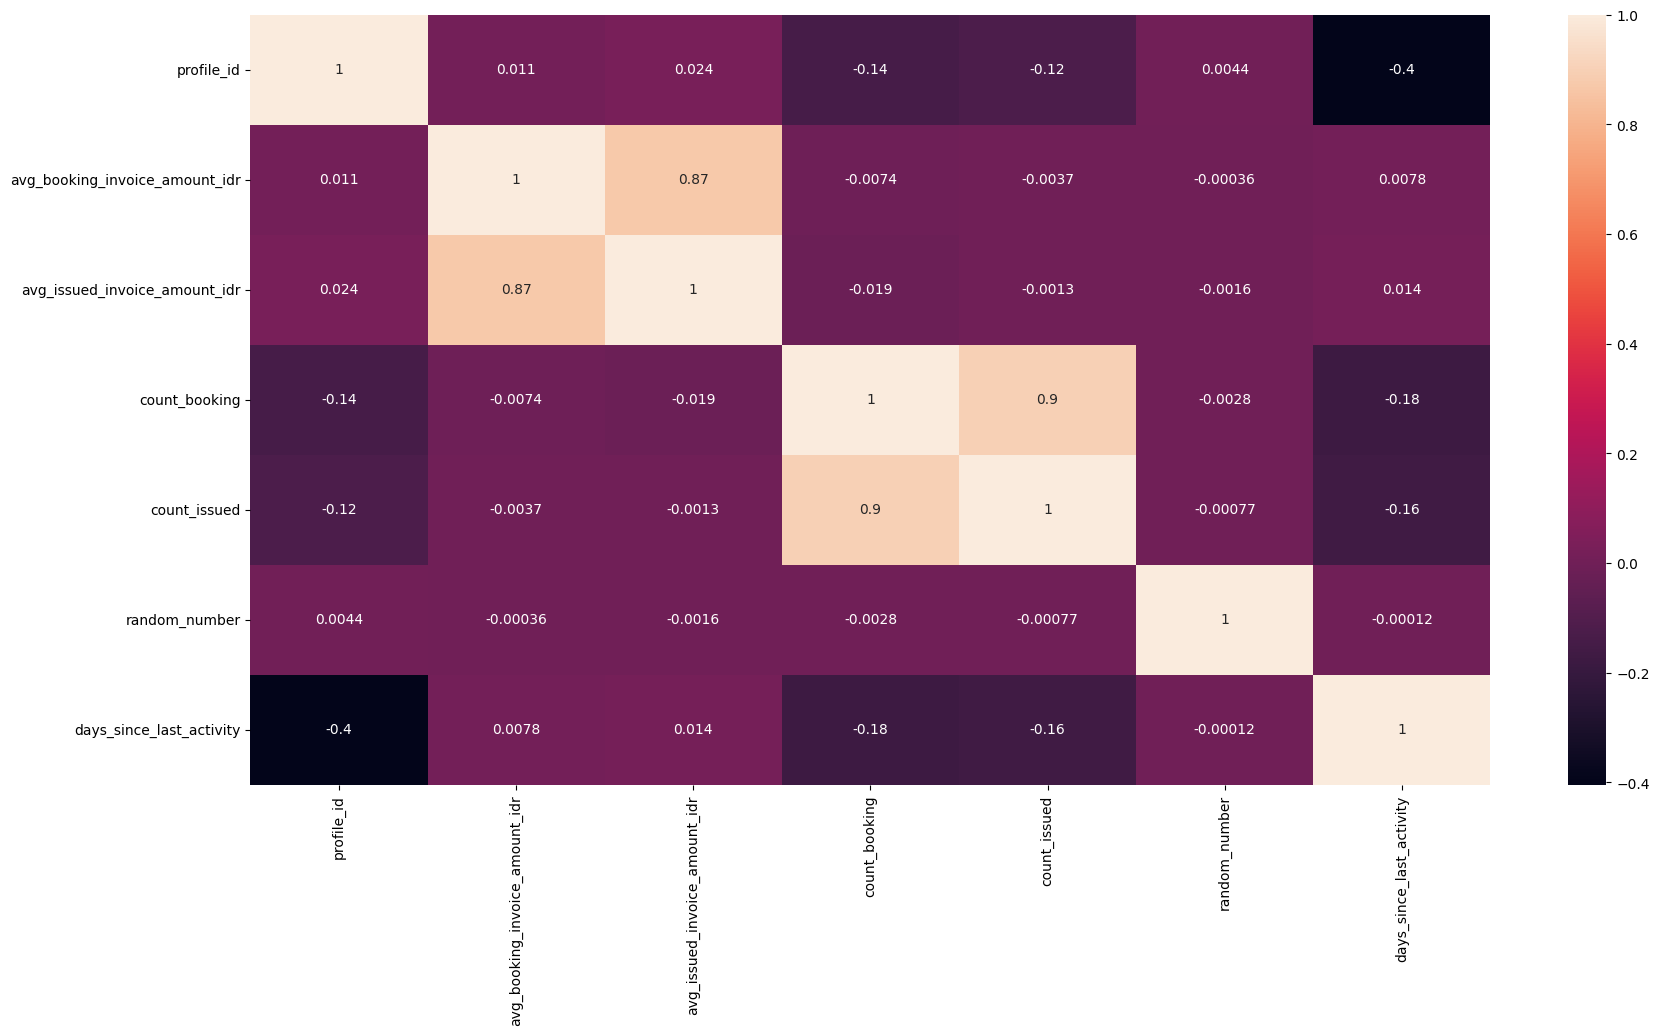

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Pearson Correlation Coefficient
From the graph above, it seems like nothing highly correlated as most of the values is below 0.5. 1 means is correlated while 0 means no correlation.

### Exploratory Data Analysis : Categorical Data

In [21]:
def categorical_data(title):
    plt.figure(figsize=(17,8))

    # calculate proportion values for each category
    prop_df = df.groupby([title, 'churn_label']).size().reset_index(name='count')
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())

    g=sns.catplot(x=title, y='prop', kind='bar', hue='churn_label', palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            '{0:.2f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()


<ipython-input-21-1bcebf98c6ae>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

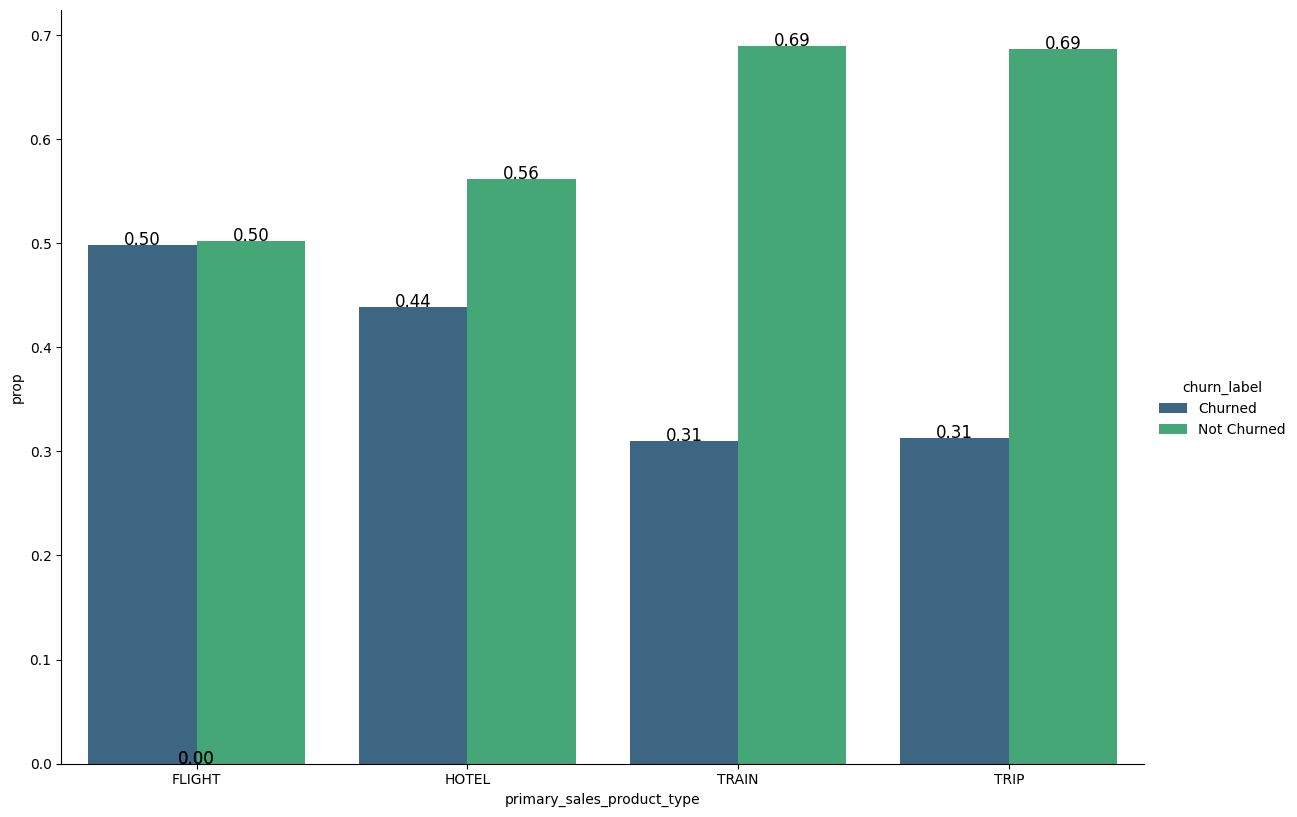

In [22]:
categorical_data("primary_sales_product_type")

### Exploratory Data Analysis : Numerical Data

In [23]:
# desciptive analysis for numerical columns
df.describe()

,profile_id,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,days_since_last_activity
count,2.791490e+05,2.791490e+05,2.065540e+05,279149.000000,279149.000000,2.791490e+05,279149.000000
mean,2.300311e+07,1.232699e+06,1.118071e+06,10.834526,5.165245,2.498735e-03,404.860200
std,2.341889e+07,3.246186e+06,1.484770e+06,28.830912,17.741227,1.444333e-03,368.962054
min,8.002700e+04,-8.275720e+05,0.000000e+00,1.000000,0.000000,3.845144e-08,-1.000000
25%,7.836410e+06,4.121430e+05,4.080608e+05,1.000000,0.000000,1.244800e-03,104.000000
50%,1.500301e+07,7.709048e+05,7.531515e+05,3.000000,1.000000,2.494584e-03,307.000000
75%,2.361442e+07,1.378235e+06,1.310226e+06,10.000000,4.000000,3.750931e-03,600.000000
max,1.040842e+08,7.940920e+08,8.899300e+07,4308.000000,3132.000000,4.999988e-03,2155.000000


In [24]:
def dist_bivariate(title):
    sns.FacetGrid(df,hue='churn_label',palette='cubehelix').map(sns.distplot,title).add_legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


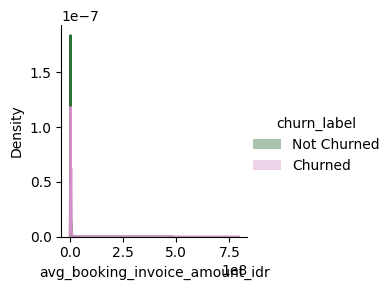

In [25]:
dist_bivariate('avg_booking_invoice_amount_idr')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


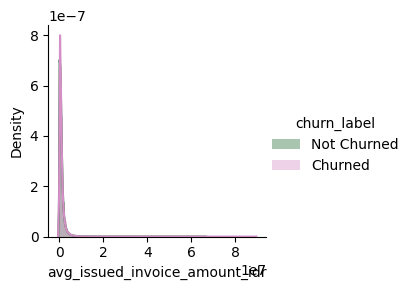

In [26]:
dist_bivariate('avg_issued_invoice_amount_idr')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


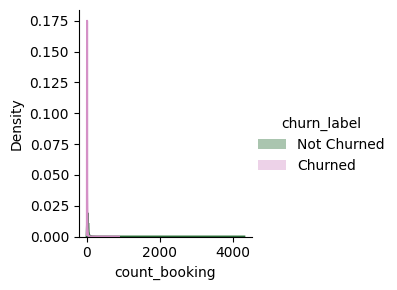

In [27]:
dist_bivariate("count_booking")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


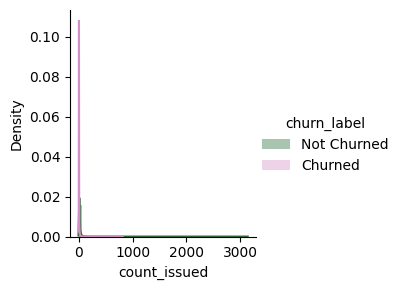

In [28]:
dist_bivariate("count_issued")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


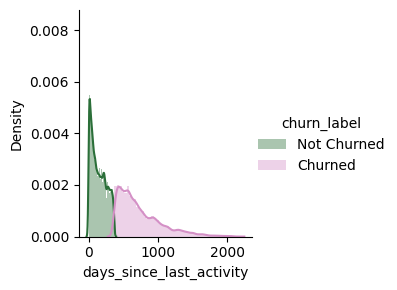

In [29]:
dist_bivariate("days_since_last_activity")

### Exploratory Data Analysis : Datetime Data

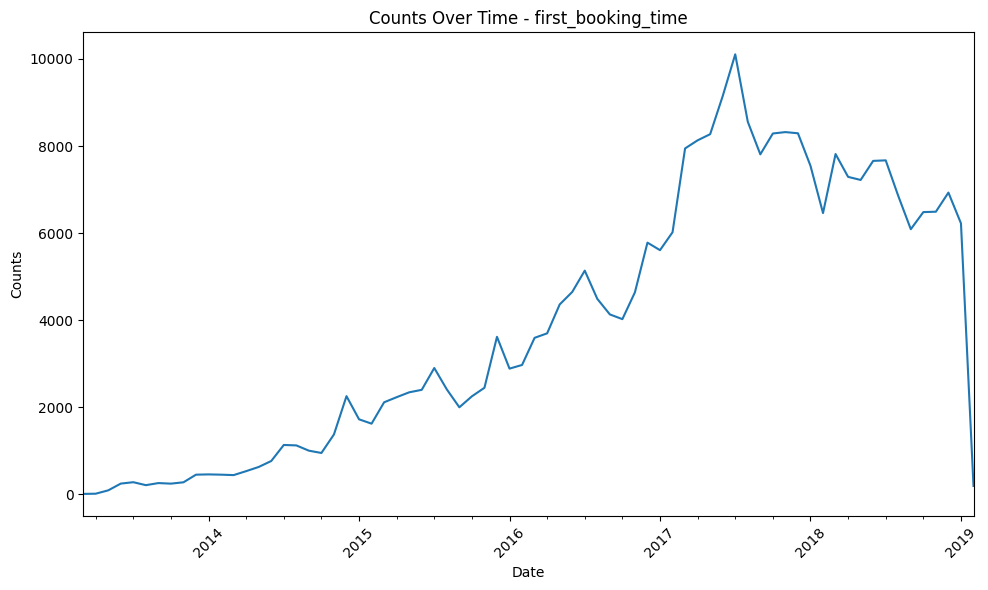

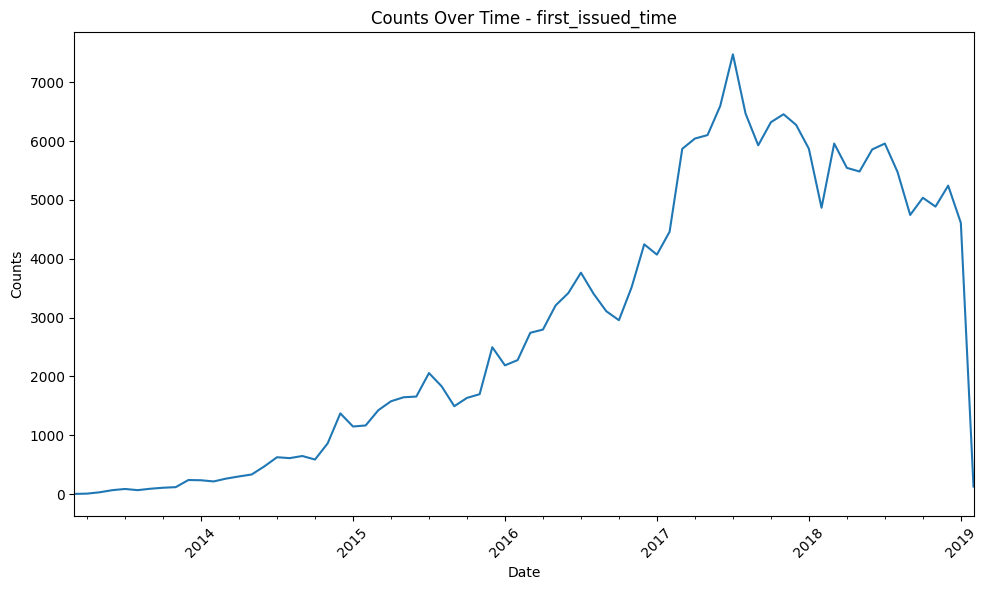

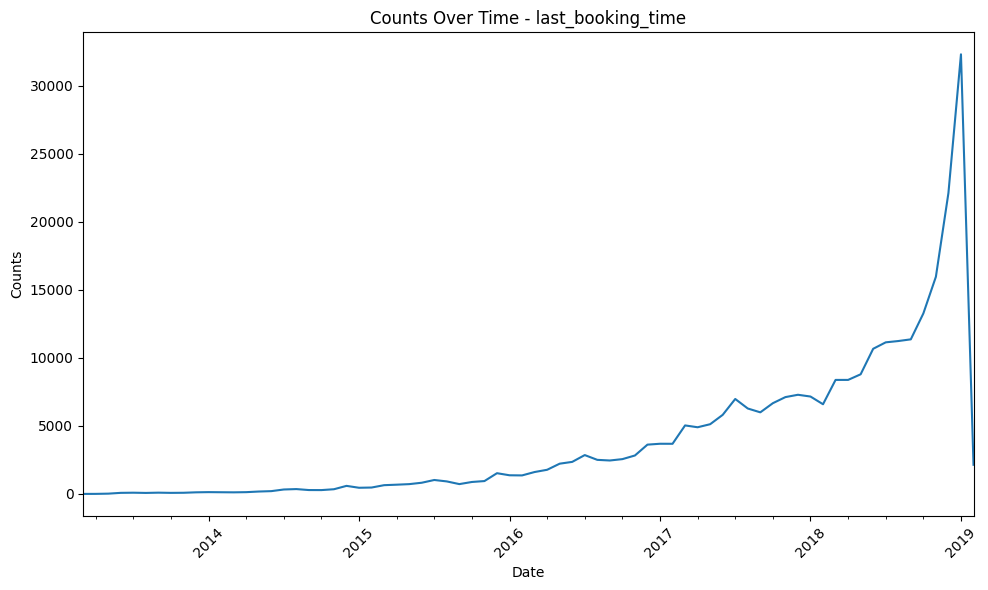

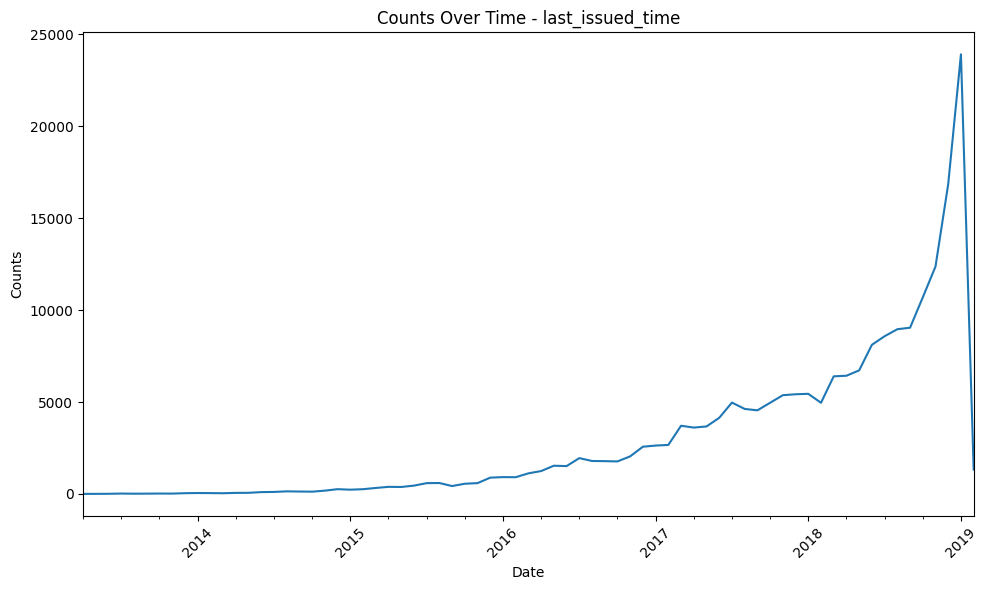

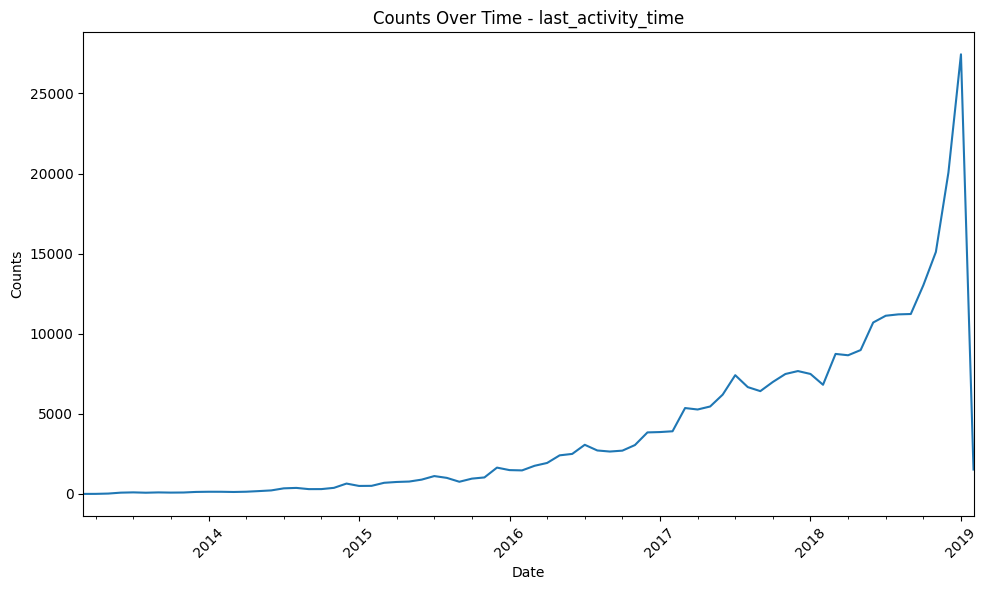

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a subset of datetime columns
df_ts = df[['first_booking_time', 'first_issued_time', 'last_booking_time', 'last_issued_time', 'last_activity_time']]

# Convert all columns in df_ts to datetime, because they are Unix timestamps in milliseconds
for col in df_ts.columns:
    df[col] = pd.to_datetime(df[col], unit='ms', errors='coerce')

# Iterate over each datetime column to plot the data
for col in df_ts.columns:
    #  Resample the data by month
    # and count the number of occurrences

    # Only the column is not full of NaT values
    if df[col].notna().any():
        # Resample and count occurrences per month
        monthly_counts = df[col].dt.to_period('M').value_counts().sort_index()

        # Plotting
        plt.figure(figsize=(10, 6))
        monthly_counts.plot(kind='line')
        plt.title(f'Counts Over Time - {col}')
        plt.xlabel('Date')
        plt.ylabel('Counts')
        plt.xticks(rotation=45)  # Rotate date labels for better readability
        plt.tight_layout()  # Adjust layout to make room for the rotated date labels
        plt.show()
    else:
        print(f'Column {col} contains no valid datetime data to plot.')



### Removing redundant variable based on business value

1. Duplicate Bookings
- Identification: Check for exact duplicates across all columns, keep the duplicates within critical columns like profile_id, booking_time, and product_type. This is because some customers tend to repeat other across various producrs

In [31]:
duplicates_all_train = train[train.duplicated(keep=False)]  # keep=False marks all duplicates as True
duplicates_all_test = test[test.duplicated(keep=False)]
print(f"Total exact duplicate entries in train: {duplicates_all_train.shape[0]}")
print(f"Total exact duplicate entries in test: {duplicates_all_test.shape[0]}")

Total exact duplicate entries in train: 0
Total exact duplicate entries in test: 0


In [32]:
train = train.drop_duplicates(keep='first')
test = train.drop_duplicates(keep='first')

2. Repeated Cancellations
* Identification: Cancellation data logic is if profile_id has booking_time records, but not issued_time records.
* Analysis: Understand the reasons behind repeated cancellations—whether they're related to customer preferences, pricing, or service issues.
* Action: Develop strategies to reduce cancellations through better pricing, flexible booking options, or improved communication about service value.

In [33]:
# Convert booking and issued times to datetime format
df['first_booking_time'] = pd.to_datetime(df['first_booking_time'], unit='ms', errors='coerce')
df['first_issued_time'] = pd.to_datetime(df['first_issued_time'], unit='ms', errors='coerce')
df['last_booking_time'] = pd.to_datetime(df['last_booking_time'], unit='ms', errors='coerce')
df['last_issued_time'] = pd.to_datetime(df['last_issued_time'], unit='ms', errors='coerce')

# Identify cancellations
df['first_booking_cancelled'] = df['first_issued_time'].isna() & df['first_booking_time'].notna()
df['last_booking_cancelled'] = df['last_issued_time'].isna() & df['last_booking_time'].notna()

# We might want to create a single column that flags any type of cancellation
df['any_cancellation'] = df['first_booking_cancelled'] | df['last_booking_cancelled']


In [34]:
# Count the number of cancellations per customer
# This approach considers any cancellation as one count
df['cancellation_count'] = df[['first_booking_cancelled', 'last_booking_cancelled']].sum(axis=1)

# Identify customers with repeated cancellations (e.g., both first and last bookings canceled)
repeated_cancellations = df[df['cancellation_count'] > 1]
repeated_cancellations

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity,churn_label,first_booking_cancelled,last_booking_cancelled,any_cancellation,cancellation_count
19394,5572901,TRAIN,2017-06-09 06:49:48.000,NaT,2017-06-09 06:49:48.000,NaT,359267.00,NaN,1,0,0.002935,2017-06-09 06:49:48.000,601,Churned,True,True,True,2
19395,19471641,TRAIN,2018-01-27 17:47:11.000,NaT,2018-01-27 17:49:28.000,NaT,459613.00,NaN,2,0,0.000684,2018-01-27 17:49:28.000,369,Churned,True,True,True,2
19396,19471641,FLIGHT,2017-07-11 12:56:51.281,NaT,2017-07-11 12:58:18.543,NaT,818587.00,NaN,2,0,0.000684,2017-07-11 12:58:18.543,569,Churned,True,True,True,2
19397,43143640,TRIP,2018-12-24 00:36:10.000,NaT,2018-12-24 00:36:10.000,NaT,1463684.00,NaN,1,0,0.003190,2018-12-24 00:36:10.000,38,Not Churned,True,True,True,2
19398,13732569,FLIGHT,2018-09-28 15:01:02.638,NaT,2018-11-03 16:49:27.730,NaT,434050.00,NaN,2,0,0.000092,2018-11-03 16:49:27.730,89,Not Churned,True,True,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91984,19078069,FLIGHT,2017-10-26 13:05:28.192,NaT,2017-10-26 13:05:28.192,NaT,2146085.00,NaN,1,0,0.001200,2017-10-26 13:05:28.192,462,Churned,True,True,True,2
91985,15175132,HOTEL,2018-08-14 16:50:33.411,NaT,2018-08-14 16:50:33.411,NaT,272601.00,NaN,1,0,0.001203,2018-08-14 16:50:33.411,170,Not Churned,True,True,True,2
91986,11862988,HOTEL,2017-07-21 00:14:25.873,NaT,2017-07-21 00:17:02.350,NaT,515426.50,NaN,2,0,0.004443,2017-07-21 00:17:02.350,559,Churned,True,True,True,2
91987,22870455,FLIGHT,2018-01-30 18:35:39.155,NaT,2018-12-12 12:03:01.344,NaT,4842387.75,NaN,4,0,0.002305,2018-12-12 12:03:01.344,50,Not Churned,True,True,True,2


In [35]:
df = df.drop(columns=['first_booking_cancelled', 'last_booking_cancelled', 'any_cancellation'])
df

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity,churn_label,cancellation_count
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396000000,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608000000,2.000823e+06,1.193237e+06,32,18,0.001562,2018-10-05 05:48:02.608000000,118,Not Churned,0
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494000128,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270000128,1.174169e+06,1.031982e+06,58,33,0.001562,2018-12-25 11:02:41.270000128,37,Not Churned,0
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000000000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000000000,2.848843e+05,2.527762e+05,62,24,0.004267,2019-01-24 09:40:02.000000000,7,Not Churned,0
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547000064,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911000064,7.374472e+05,5.875060e+05,36,22,0.004267,2019-01-16 13:00:03.911000064,15,Not Churned,0
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531000064,2019-01-06 08:31:52.498,2018-11-22 12:53:41.529999872,1.604698e+06,1.443118e+06,53,20,0.002460,2018-11-22 12:53:41.529999872,70,Not Churned,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279144,18742450,FLIGHT,2017-06-21 13:26:07.801,2017-06-21 13:45:10.028999936,2018-01-21 03:12:57.497,2018-01-21 03:17:49.087000064,8.165191e+05,8.718524e+05,18,16,0.000031,2018-01-21 03:17:49.087000064,375,Churned,0
279145,3384069,HOTEL,2014-12-30 16:47:46.872,2014-12-30 17:03:35.267000064,2015-12-27 01:25:09.320,2015-12-27 01:26:41.119000064,6.895681e+05,6.210913e+05,21,16,0.002273,2015-12-27 01:26:41.119000064,1131,Churned,0
279146,14557207,TRAIN,2017-11-22 11:53:32.000,2017-11-22 12:01:36.000000000,2019-02-01 09:41:37.000,2019-02-01 09:40:31.000000000,1.648331e+05,1.799238e+05,29,16,0.002195,2019-02-01 09:40:31.000000000,-1,Not Churned,0
279147,8309553,FLIGHT,2016-04-29 06:48:45.172,2016-06-08 07:44:48.215000064,2017-11-21 01:50:39.160,2017-11-09 14:05:29.041999872,8.223881e+05,7.944720e+05,34,16,0.003150,2017-11-09 14:05:29.041999872,448,Churned,0


<ipython-input-21-1bcebf98c6ae>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

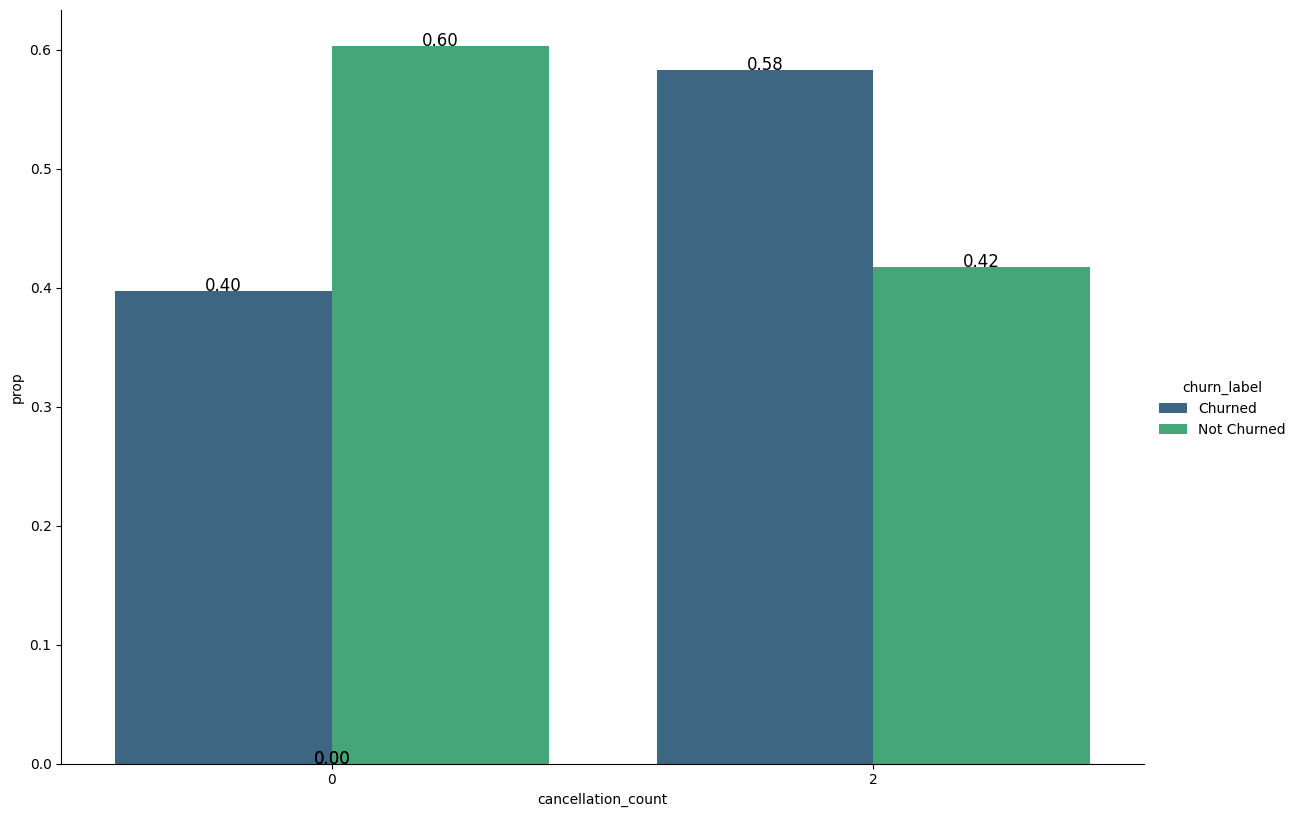

In [36]:
# Now see the cancellation point of view against churned
categorical_data("cancellation_count")

There are no duplicated rows

## B. Data Preparation : Data Train (Data Pre-Processing)
1. Outliers Analysis
2. Missing Value Handling
3. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data. This is done on each data train and data test, so as to avoid data leakage.

##### 1. Outliers Analysis

##### Removing Outliers
Using IQR because from numerical data, the distribution data is not normal distribution

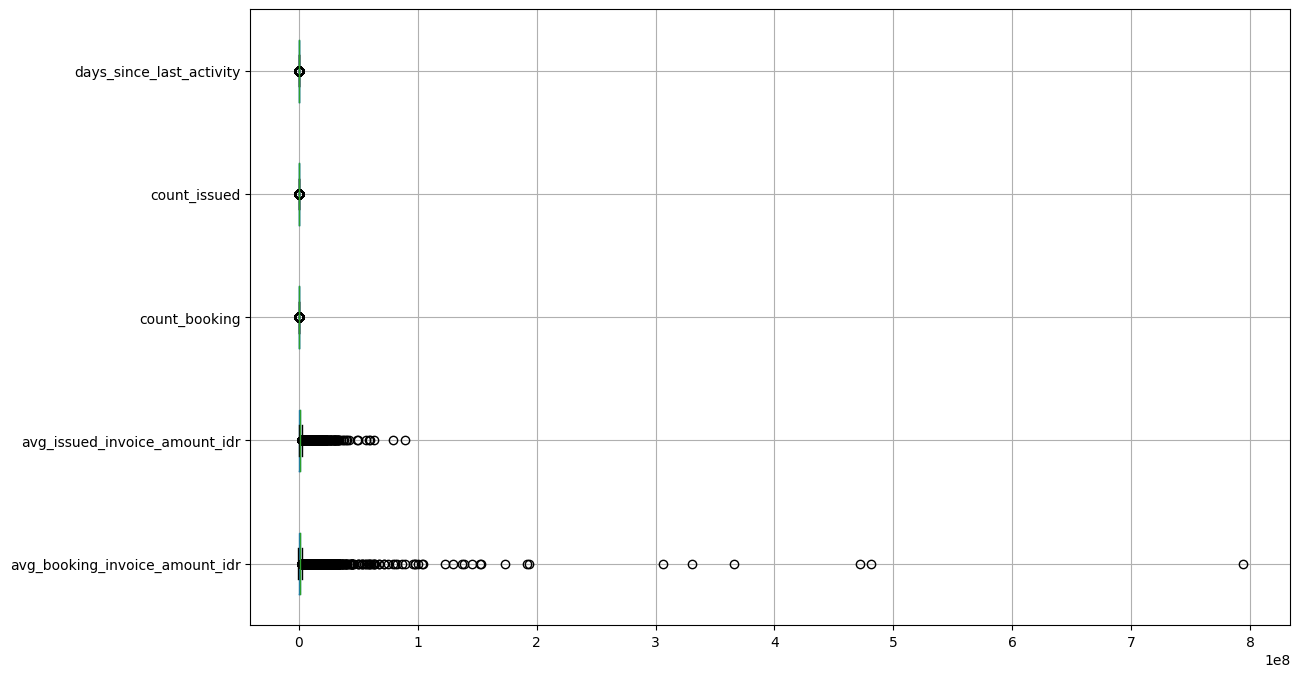

In [37]:
# Outlier Analysis

# Select columns to exclude
exclude_columns = ['profile_id', 'random_number']

# Select the subset of the DataFrame excluding the specified columns
train = train[train.columns.difference(exclude_columns)]

# Plotting the boxplot for the selected subset
plt.figure(figsize=(16, 8))
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In this section, we only want to remove outliers on the variables avg_issued_invoice_amount_idr and avg_booking_invoice_amount_idr.
This is because, when we apply removing outliers on all the columns above, there might be a chance when the data are not varied enough to learn for label encoding on the ytrain

###### remove outliers : avg_booking_invoice_amount_idr

In [38]:
train.shape

(195404, 12)

In [39]:
Q1 = train["avg_booking_invoice_amount_idr"].quantile(0.25)
Q3 = train["avg_booking_invoice_amount_idr"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [40]:
train = train[(train["avg_booking_invoice_amount_idr"] >= low_limit) &
              (train["avg_booking_invoice_amount_idr"] <= high_limit)
              ]

In [41]:
train.shape

(180528, 12)

###### remove outliers : avg_issued_invoice_amount_idr

In [42]:
train.shape

(180528, 12)

In [43]:
Q1 = train["avg_issued_invoice_amount_idr"].quantile(0.25)
Q3 = train["avg_issued_invoice_amount_idr"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [44]:
train = train[(train["avg_issued_invoice_amount_idr"] >= low_limit) &
              (train["avg_issued_invoice_amount_idr"] <= high_limit)
              ]

In [45]:
train.shape

(130071, 12)

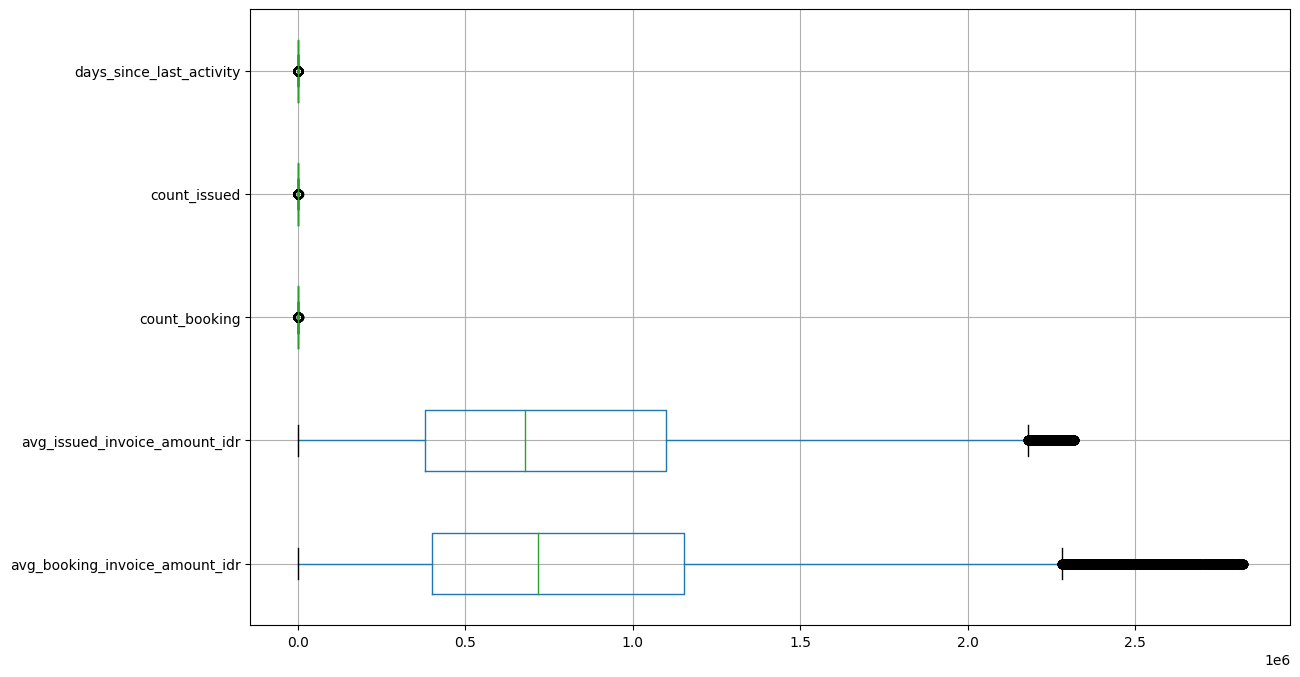

In [46]:
# Check outlier again

# Select columns to exclude
exclude_columns = ['profile_id', 'random_number']

# Select the subset of the DataFrame excluding the specified columns
train = train[train.columns.difference(exclude_columns)]

# Plotting the boxplot for the selected subset
plt.figure(figsize=(16, 8))
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()


Now there are no outliers in train Data

##### 2. Removing Duplicated

In [47]:
train.shape

(130071, 12)

In [48]:
# Check duplicate
duplicates_all_train = train[train.duplicated(keep=False)]
print(f"Total exact duplicate entries in train: {duplicates_all_train.shape[0]}")

Total exact duplicate entries in train: 468


In [49]:
train = train.drop_duplicates(keep='first')
train.shape

(129837, 12)

#### 3. Missing Value Handling

In [50]:
train

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,churn_label,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type
126344,3.668475e+05,3.667790e+05,Churned,2,1,388,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,HOTEL
199477,6.562892e+05,8.016694e+05,Not Churned,6,2,223,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:42:20.942000128,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,FLIGHT
351,1.054755e+05,9.035777e+04,Not Churned,51,22,16,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:39:51.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,TRAIN
265951,5.560091e+05,4.865977e+05,Not Churned,12,10,102,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:27:50.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,TRAIN
5333,1.369181e+06,1.570969e+06,Churned,69,37,608,2013-07-10 08:51:03.989,2015-12-18 05:02:09.132000000,2017-06-02 15:55:08.121999872,2017-06-30 11:59:42.210,2017-06-02 15:55:08.121999872,FLIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...
256834,1.360948e+06,1.338320e+06,Not Churned,25,8,0,2015-12-04 07:33:20.363,2017-04-03 18:38:47.111000064,2019-01-31 23:35:47.321999872,2019-01-31 22:41:47.933,2019-01-31 23:35:47.321999872,FLIGHT
206912,9.098861e+05,4.862941e+05,Churned,10,3,400,2017-08-29 07:49:19.830,2017-09-05 11:28:00.318000128,2017-12-27 09:44:23.612000000,2017-12-27 09:32:47.975,2017-12-27 09:44:23.612000000,FLIGHT
267256,1.308002e+06,1.192867e+06,Churned,27,11,664,2015-02-08 03:45:01.118,2015-02-08 08:07:09.063000064,2017-04-07 17:48:13.084000000,2017-06-07 04:27:16.991,2017-04-07 17:48:13.084000000,FLIGHT
204324,1.613288e+06,1.613288e+06,Not Churned,3,3,259,2018-02-22 14:44:16.397,2018-02-22 14:50:43.852000000,2018-05-17 15:28:04.251000064,2018-05-17 15:23:21.747,2018-05-17 15:28:04.251000064,FLIGHT


In [51]:
train.sample(10)

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,churn_label,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type
246694,3.036882e+05,3.036882e+05,Not Churned,6,6,54,2017-11-30 10:37:51.455,2017-11-30 10:47:47.884000000,2018-12-08 10:50:25.588000000,2018-12-08 10:28:39.350,2018-12-08 10:50:25.588000000,HOTEL
131254,4.510580e+05,4.333890e+05,Not Churned,2,1,271,2018-05-05 07:00:04.094,2018-05-05 07:27:16.849999872,2018-05-05 07:27:16.849999872,2018-05-10 13:35:43.660,2018-05-05 07:27:16.849999872,FLIGHT
250587,1.248855e+05,1.266103e+05,Not Churned,27,7,177,2017-06-02 13:22:13.000,2017-06-16 09:23:13.000000000,2018-08-07 13:08:45.000000000,2019-01-07 08:26:25.000,2018-08-07 13:08:45.000000000,TRAIN
195411,4.043933e+05,3.842230e+05,Not Churned,6,2,46,2018-05-14 21:37:00.000,2018-05-14 22:03:14.000000000,2018-12-16 11:22:23.000000000,2018-12-16 11:10:33.000,2018-12-16 11:22:23.000000000,TRAIN
192945,1.496560e+05,1.496560e+05,Not Churned,2,2,56,2018-11-11 08:20:47.000,2018-11-11 08:25:59.000000000,2018-12-06 14:29:41.000000000,2018-12-06 13:55:51.000,2018-12-06 14:29:41.000000000,TRAIN
98566,7.327200e+04,7.327200e+04,Churned,1,1,570,2017-07-10 05:26:21.000,2017-07-10 05:30:27.000000000,2017-07-10 05:30:27.000000000,2017-07-10 05:26:21.000,2017-07-10 05:30:27.000000000,TRAIN
133374,2.521990e+05,2.394890e+05,Not Churned,2,1,42,2018-12-20 02:47:50.000,2018-12-20 03:16:17.000000000,2018-12-20 03:16:17.000000000,2018-12-20 03:08:26.000,2018-12-20 03:16:17.000000000,TRAIN
242795,6.725243e+05,6.725243e+05,Not Churned,6,6,170,2017-06-21 14:52:57.663,2017-06-21 15:07:41.600999936,2018-08-14 12:16:53.728000000,2018-08-14 11:39:46.695,2018-08-14 12:16:53.728000000,HOTEL
119115,8.124812e+05,7.961238e+05,Not Churned,2,1,14,2019-01-05 14:14:16.173,2019-01-17 06:27:23.876999936,2019-01-17 06:27:23.876999936,2019-01-17 04:28:21.777,2019-01-17 06:27:23.876999936,FLIGHT
140201,1.159844e+06,1.019887e+06,Churned,2,1,479,2017-02-08 10:38:39.269,2017-10-09 08:50:20.616999936,2017-10-09 08:50:20.616999936,2017-10-09 08:48:30.239,2017-10-09 08:50:20.616999936,HOTEL


##### Missing Value Check each rows

In [52]:
train['n_missing'] = train.isnull().sum(axis=1)

In [53]:
train.sort_values('n_missing',ascending=False)

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,churn_label,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type,n_missing
18412,1.631656e+06,1.209792e+06,Not Churned,82,26,18,2015-09-04 01:11:35.716,2015-09-04 01:43:59.215000064,2019-01-13 09:18:06.712999936,2019-01-28 14:54:51.076,2019-01-13 09:18:06.712999936,HOTEL,0
126344,3.668475e+05,3.667790e+05,Churned,2,1,388,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,HOTEL,0
199477,6.562892e+05,8.016694e+05,Not Churned,6,2,223,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:42:20.942000128,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,FLIGHT,0
351,1.054755e+05,9.035777e+04,Not Churned,51,22,16,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:39:51.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,TRAIN,0
265951,5.560091e+05,4.865977e+05,Not Churned,12,10,102,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:27:50.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,TRAIN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250603,6.466774e+05,4.845004e+05,Not Churned,21,7,173,2017-12-09 09:57:29.000,2017-12-09 10:27:14.000000000,2018-08-11 00:20:17.000000000,2018-08-11 00:16:39.000,2018-08-11 00:20:17.000000000,TRAIN,0
94582,1.109711e+06,8.795290e+05,Not Churned,2,1,162,2018-08-22 03:16:52.000,2018-08-22 03:47:54.000000000,2018-08-22 03:47:54.000000000,2018-08-22 03:29:17.000,2018-08-22 03:47:54.000000000,TRAIN,0
169256,1.990651e+06,1.819108e+06,Churned,17,2,1460,2014-12-19 14:53:18.075,2015-01-25 03:16:20.358000128,2015-02-01 03:30:46.059000064,2015-04-22 17:28:57.597,2015-02-01 03:30:46.059000064,FLIGHT,0
174785,2.654460e+05,3.069260e+05,Not Churned,9,2,49,2017-07-07 06:51:08.000,2017-08-01 15:31:56.000000000,2018-12-13 06:22:59.000000000,2018-12-29 15:52:47.000,2018-12-13 06:22:59.000000000,TRAIN,0


In [54]:
train.drop('n_missing', axis=1, inplace=True)

In [55]:
train

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,churn_label,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type
126344,3.668475e+05,3.667790e+05,Churned,2,1,388,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,HOTEL
199477,6.562892e+05,8.016694e+05,Not Churned,6,2,223,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:42:20.942000128,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,FLIGHT
351,1.054755e+05,9.035777e+04,Not Churned,51,22,16,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:39:51.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,TRAIN
265951,5.560091e+05,4.865977e+05,Not Churned,12,10,102,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:27:50.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,TRAIN
5333,1.369181e+06,1.570969e+06,Churned,69,37,608,2013-07-10 08:51:03.989,2015-12-18 05:02:09.132000000,2017-06-02 15:55:08.121999872,2017-06-30 11:59:42.210,2017-06-02 15:55:08.121999872,FLIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...
256834,1.360948e+06,1.338320e+06,Not Churned,25,8,0,2015-12-04 07:33:20.363,2017-04-03 18:38:47.111000064,2019-01-31 23:35:47.321999872,2019-01-31 22:41:47.933,2019-01-31 23:35:47.321999872,FLIGHT
206912,9.098861e+05,4.862941e+05,Churned,10,3,400,2017-08-29 07:49:19.830,2017-09-05 11:28:00.318000128,2017-12-27 09:44:23.612000000,2017-12-27 09:32:47.975,2017-12-27 09:44:23.612000000,FLIGHT
267256,1.308002e+06,1.192867e+06,Churned,27,11,664,2015-02-08 03:45:01.118,2015-02-08 08:07:09.063000064,2017-04-07 17:48:13.084000000,2017-06-07 04:27:16.991,2017-04-07 17:48:13.084000000,FLIGHT
204324,1.613288e+06,1.613288e+06,Not Churned,3,3,259,2018-02-22 14:44:16.397,2018-02-22 14:50:43.852000000,2018-05-17 15:28:04.251000064,2018-05-17 15:23:21.747,2018-05-17 15:28:04.251000064,FLIGHT


##### Missing Value check each columns

In [56]:
train.isnull().sum()

avg_booking_invoice_amount_idr    0
avg_issued_invoice_amount_idr     0
churn_label                       0
count_booking                     0
count_issued                      0
days_since_last_activity          0
first_booking_time                0
first_issued_time                 0
last_activity_time                0
last_booking_time                 0
last_issued_time                  0
primary_sales_product_type        0
dtype: int64

In [57]:
train.isna().sum()

avg_booking_invoice_amount_idr    0
avg_issued_invoice_amount_idr     0
churn_label                       0
count_booking                     0
count_issued                      0
days_since_last_activity          0
first_booking_time                0
first_issued_time                 0
last_activity_time                0
last_booking_time                 0
last_issued_time                  0
primary_sales_product_type        0
dtype: int64

##### Missing value check NaN

In [58]:
train.isnull().sum().sum()

0

In [59]:
train.isnull().any().any()

False

In [60]:
count_nan = train.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: avg_booking_invoice_amount_idr    0
avg_issued_invoice_amount_idr     0
churn_label                       0
count_booking                     0
count_issued                      0
days_since_last_activity          0
first_booking_time                0
first_issued_time                 0
last_activity_time                0
last_booking_time                 0
last_issued_time                  0
primary_sales_product_type        0
dtype: int64


In [61]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= avg_booking_invoice_amount_idr =================


0.000000         8
864000.000000    5
598000.000000    4
682000.000000    4
134008.000000    3
                ..
329362.335000    1
44085.000000     1
335151.526053    1
99414.666667     1
236757.714286    1
Name: avg_booking_invoice_amount_idr, Length: 129160, dtype: int64


============= avg_issued_invoice_amount_idr =================


0.000000e+00    15
5.980000e+05     7
8.640000e+05     6
6.820000e+05     6
3.800000e+05     5
                ..
2.933918e+05     1
9.379191e+05     1
1.490880e+06     1
1.492380e+06     1
1.432082e+06     1
Name: avg_issued_invoice_amount_idr, Length: 128107, dtype: int64


============= churn_label =================


Not Churned    78342
Churned        51495
Name: churn_label, dtype: int64


============= count_booking =================


1      20749
2      15656
3      11967
4       9137
5       7471
       ...  
426        1
481        1
593        1
428        1
324        1
Name: count_booking, Length: 436, dtype: int64


============= count_issued =================


1      45839
2      20947
3      12112
4       8273
5       5987
       ...  
268        1
225        1
326        1
192        1
189        1
Name: count_issued, Length: 298, dtype: int64


============= days_since_last_activity =================


-1       855
 0       748
 1       741
 2       694
 3       626
        ... 
 1714      1
 1718      1
 1552      1
 1837      1
 1750      1
Name: days_since_last_activity, Length: 1878, dtype: int64


============= first_booking_time =================


2018-10-29 08:12:29.000    2
2017-03-23 17:37:32.000    2
2018-01-13 23:11:06.000    2
2017-03-25 17:01:57.000    2
2017-12-18 11:02:37.000    2
                          ..
2017-12-08 11:42:46.000    1
2017-02-21 22:59:37.286    1
2017-09-19 12:00:26.503    1
2017-03-10 13:00:10.474    1
2018-07-27 06:07:58.899    1
Name: first_booking_time, Length: 129827, dtype: int64


============= first_issued_time =================


2017-07-29 03:35:12.000000000    3
2017-09-26 04:23:28.000000000    2
2018-08-05 07:38:29.000000000    2
2019-01-31 05:25:29.000000000    2
2018-03-24 07:49:10.000000000    2
                                ..
2016-11-14 01:22:09.396000000    1
2018-11-01 17:28:23.000000000    1
2018-07-27 06:10:17.094000128    1
2017-12-02 05:46:38.244000000    1
2017-10-06 03:21:49.880999936    1
Name: first_issued_time, Length: 129687, dtype: int64


============= last_activity_time =================


2019-01-30 10:37:02.000000000    3
2018-09-29 05:52:13.000000000    3
2018-06-19 03:52:57.000000000    2
2018-10-29 07:25:47.000000000    2
2019-02-01 04:24:42.000000000    2
                                ..
2017-06-06 15:52:14.000000000    1
2018-12-30 04:01:53.423000064    1
2016-05-13 03:14:18.411000064    1
2017-07-14 12:49:28.000000000    1
2017-10-12 09:18:59.392999936    1
Name: last_activity_time, Length: 129608, dtype: int64


============= last_booking_time =================


2018-12-12 04:10:44.000    2
2019-01-26 02:31:25.000    2
2018-08-22 03:26:25.000    2
2018-10-02 08:48:38.000    2
2018-10-31 00:44:18.000    2
                          ..
2018-11-06 01:15:52.548    1
2017-09-19 12:00:26.503    1
2017-06-10 23:08:08.141    1
2019-01-24 02:51:04.431    1
2017-12-02 05:27:30.041    1
Name: last_booking_time, Length: 129824, dtype: int64


============= last_issued_time =================


2019-01-30 10:37:02.000000000    3
2018-09-29 05:52:13.000000000    3
2018-06-19 03:52:57.000000000    2
2018-10-29 07:25:47.000000000    2
2019-02-01 04:24:42.000000000    2
                                ..
2017-06-06 15:52:14.000000000    1
2018-12-30 04:01:53.423000064    1
2016-05-13 03:14:18.411000064    1
2017-07-14 12:49:28.000000000    1
2017-10-12 09:18:59.392999936    1
Name: last_issued_time, Length: 129608, dtype: int64


============= primary_sales_product_type =================


FLIGHT    62121
HOTEL     44001
TRAIN     22705
TRIP       1010
Name: primary_sales_product_type, dtype: int64

##### Check percentage of missing value in each column selection

In [62]:
#check percentage missing value
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
avg_booking_invoice_amount_idr,avg_booking_invoice_amount_idr,0.0
avg_issued_invoice_amount_idr,avg_issued_invoice_amount_idr,0.0
churn_label,churn_label,0.0
count_booking,count_booking,0.0
count_issued,count_issued,0.0
days_since_last_activity,days_since_last_activity,0.0
first_booking_time,first_booking_time,0.0
first_issued_time,first_issued_time,0.0
last_activity_time,last_activity_time,0.0
last_booking_time,last_booking_time,0.0


From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- days_since_last_activity : -1

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values.

**If it contained a lot of missing value (let say >35%), then we can just drop that column**. If not, then we can do some imputation.

#### imputation data for : days_since_last_activity

---



In [63]:
# Median imputation on days_since_last_activity column : train
median_days_since_last_activity_train = train[train['days_since_last_activity']!=-1]['days_since_last_activity'].median()
median_days_since_last_activity_train

264.0

In [64]:
#implement missing value imputation to train
train['days_since_last_activity'] = train['days_since_last_activity'].apply(lambda x: median_days_since_last_activity_train if x==-1 else x) #train

In [65]:
# Check again
train['days_since_last_activity'].value_counts()

264.0     985
0.0       748
1.0       741
2.0       694
3.0       626
         ... 
2013.0      1
1833.0      1
1781.0      1
1938.0      1
1973.0      1
Name: days_since_last_activity, Length: 1877, dtype: int64

#### Check again for each columns

In [66]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= avg_booking_invoice_amount_idr =================


0.000000         8
864000.000000    5
598000.000000    4
682000.000000    4
134008.000000    3
                ..
329362.335000    1
44085.000000     1
335151.526053    1
99414.666667     1
236757.714286    1
Name: avg_booking_invoice_amount_idr, Length: 129160, dtype: int64


============= avg_issued_invoice_amount_idr =================


0.000000e+00    15
5.980000e+05     7
8.640000e+05     6
6.820000e+05     6
3.800000e+05     5
                ..
2.933918e+05     1
9.379191e+05     1
1.490880e+06     1
1.492380e+06     1
1.432082e+06     1
Name: avg_issued_invoice_amount_idr, Length: 128107, dtype: int64


============= churn_label =================


Not Churned    78342
Churned        51495
Name: churn_label, dtype: int64


============= count_booking =================


1      20749
2      15656
3      11967
4       9137
5       7471
       ...  
426        1
481        1
593        1
428        1
324        1
Name: count_booking, Length: 436, dtype: int64


============= count_issued =================


1      45839
2      20947
3      12112
4       8273
5       5987
       ...  
268        1
225        1
326        1
192        1
189        1
Name: count_issued, Length: 298, dtype: int64


============= days_since_last_activity =================


264.0     985
0.0       748
1.0       741
2.0       694
3.0       626
         ... 
2013.0      1
1833.0      1
1781.0      1
1938.0      1
1973.0      1
Name: days_since_last_activity, Length: 1877, dtype: int64


============= first_booking_time =================


2018-10-29 08:12:29.000    2
2017-03-23 17:37:32.000    2
2018-01-13 23:11:06.000    2
2017-03-25 17:01:57.000    2
2017-12-18 11:02:37.000    2
                          ..
2017-12-08 11:42:46.000    1
2017-02-21 22:59:37.286    1
2017-09-19 12:00:26.503    1
2017-03-10 13:00:10.474    1
2018-07-27 06:07:58.899    1
Name: first_booking_time, Length: 129827, dtype: int64


============= first_issued_time =================


2017-07-29 03:35:12.000000000    3
2017-09-26 04:23:28.000000000    2
2018-08-05 07:38:29.000000000    2
2019-01-31 05:25:29.000000000    2
2018-03-24 07:49:10.000000000    2
                                ..
2016-11-14 01:22:09.396000000    1
2018-11-01 17:28:23.000000000    1
2018-07-27 06:10:17.094000128    1
2017-12-02 05:46:38.244000000    1
2017-10-06 03:21:49.880999936    1
Name: first_issued_time, Length: 129687, dtype: int64


============= last_activity_time =================


2019-01-30 10:37:02.000000000    3
2018-09-29 05:52:13.000000000    3
2018-06-19 03:52:57.000000000    2
2018-10-29 07:25:47.000000000    2
2019-02-01 04:24:42.000000000    2
                                ..
2017-06-06 15:52:14.000000000    1
2018-12-30 04:01:53.423000064    1
2016-05-13 03:14:18.411000064    1
2017-07-14 12:49:28.000000000    1
2017-10-12 09:18:59.392999936    1
Name: last_activity_time, Length: 129608, dtype: int64


============= last_booking_time =================


2018-12-12 04:10:44.000    2
2019-01-26 02:31:25.000    2
2018-08-22 03:26:25.000    2
2018-10-02 08:48:38.000    2
2018-10-31 00:44:18.000    2
                          ..
2018-11-06 01:15:52.548    1
2017-09-19 12:00:26.503    1
2017-06-10 23:08:08.141    1
2019-01-24 02:51:04.431    1
2017-12-02 05:27:30.041    1
Name: last_booking_time, Length: 129824, dtype: int64


============= last_issued_time =================


2019-01-30 10:37:02.000000000    3
2018-09-29 05:52:13.000000000    3
2018-06-19 03:52:57.000000000    2
2018-10-29 07:25:47.000000000    2
2019-02-01 04:24:42.000000000    2
                                ..
2017-06-06 15:52:14.000000000    1
2018-12-30 04:01:53.423000064    1
2016-05-13 03:14:18.411000064    1
2017-07-14 12:49:28.000000000    1
2017-10-12 09:18:59.392999936    1
Name: last_issued_time, Length: 129608, dtype: int64


============= primary_sales_product_type =================


FLIGHT    62121
HOTEL     44001
TRAIN     22705
TRIP       1010
Name: primary_sales_product_type, dtype: int64

## C. Data Preparation : Data Test
1. Outlier Analysis
2. Missing Value Handling
2. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the test data

##### 1. Outliers Analysis
Because we did outlier analysis in training data and it removed many rows in train data. Hence we ought to do outlier treatment in test data based on the train data


##### Removing Outliers
Using IQR because we removed some rows from train numerical data

In [67]:
print(f'Before filtering: {test.shape}')

Before filtering: (195404, 14)


In [68]:
test = test[(test["days_since_last_activity"] >= low_limit) & (test["days_since_last_activity"] <= high_limit)]


In [69]:
print(f'After filtering: {test.shape}')

After filtering: (195404, 14)


##### Removing Duplicated

In [70]:
test.shape

(195404, 14)

In [71]:
# Check duplicate
duplicates_all_test = test[test.duplicated(keep=False)]
print(f"Total exact duplicate entries in test: {duplicates_all_test.shape[0]}")

Total exact duplicate entries in test: 0


In [72]:
test = test.drop_duplicates(keep='first')
test.shape

(195404, 14)

##### 2. Missing Value Handling

###### Missing Value Check each rows

In [73]:
test['n_missing'] = test.isnull().sum(axis=1)
test.sort_values('n_missing',ascending=False)

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity,churn_label,n_missing
74415,7350511,HOTEL,2017-06-22 05:23:35.092,NaT,2017-06-22 05:23:35.092,NaT,1.886749e+06,NaN,1,0,0.003362,2017-06-22 05:23:35.092,588,Churned,3
46340,12690274,FLIGHT,2017-04-19 09:14:09.350,NaT,2017-04-19 09:14:09.350,NaT,1.132381e+06,NaN,1,0,0.004580,2017-04-19 09:14:09.350,652,Churned,3
84571,9603800,FLIGHT,2016-05-22 08:51:34.318,NaT,2016-05-22 08:51:34.318,NaT,1.030238e+06,NaN,1,0,0.003719,2016-05-22 08:51:34.318,984,Churned,3
86490,53892940,HOTEL,2018-07-06 16:04:14.385,NaT,2018-07-06 16:04:14.385,NaT,9.894420e+05,NaN,1,0,0.002159,2018-07-06 16:04:14.385,209,Not Churned,3
75637,15072775,HOTEL,2017-05-15 12:18:09.774,NaT,2017-12-08 14:02:18.392,NaT,4.712914e+05,NaN,9,0,0.001324,2017-12-08 14:02:18.392,419,Churned,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182141,12305865,TRAIN,2018-10-30 08:10:42.000,2018-10-30 08:12:47.000000000,2019-01-15 00:20:16.000,2019-01-15 00:22:55.000,4.495275e+05,4.495275e+05,2,2,0.003998,2019-01-15 00:22:55.000,16,Not Churned,0
269980,7581250,FLIGHT,2016-01-27 00:59:00.169,2016-01-29 11:24:56.111000064,2016-11-27 07:55:37.593,2016-11-27 08:02:22.228,1.365894e+06,1.271069e+06,17,12,0.001762,2016-11-27 08:02:22.228,795,Churned,0
212017,24049659,FLIGHT,2017-11-14 01:57:44.931,2017-11-14 02:14:31.424000000,2018-08-23 03:31:06.551,2018-08-23 03:38:55.408,9.382138e+05,8.100094e+05,5,3,0.003586,2018-08-23 03:38:55.408,161,Not Churned,0
98263,5855147,HOTEL,2017-05-25 11:33:25.677,2017-05-26 03:35:01.276000000,2017-06-07 17:15:14.817,2017-05-26 03:35:01.276,7.750290e+05,2.933230e+05,4,1,0.003483,2017-05-26 03:35:01.276,615,Churned,0


In [74]:
test.drop('n_missing', axis=1, inplace=True)
test

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity,churn_label
126344,3934855,HOTEL,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,3.668475e+05,3.667790e+05,2,1,0.004938,2018-01-08 10:56:21.575000064,388,Churned
199477,21614759,FLIGHT,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,6.562892e+05,8.016694e+05,6,2,0.000250,2018-06-22 14:42:20.942000128,223,Not Churned
351,4540798,TRAIN,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,1.054755e+05,9.035777e+04,51,22,0.004935,2019-01-15 05:39:51.000000000,16,Not Churned
265951,5091353,TRAIN,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,5.560091e+05,4.865977e+05,12,10,0.004052,2018-10-21 15:27:50.000000000,102,Not Churned
59298,31039722,TRAIN,2018-01-21 05:51:55.000,NaT,2018-01-21 05:51:55.000,NaT,2.590550e+05,NaN,1,0,0.003030,2018-01-21 05:51:55.000000000,375,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256834,6008686,FLIGHT,2015-12-04 07:33:20.363,2017-04-03 18:38:47.111000064,2019-01-31 22:41:47.933,2019-01-31 23:35:47.321999872,1.360948e+06,1.338320e+06,25,8,0.001954,2019-01-31 23:35:47.321999872,0,Not Churned
206912,18957021,FLIGHT,2017-08-29 07:49:19.830,2017-09-05 11:28:00.318000128,2017-12-27 09:32:47.975,2017-12-27 09:44:23.612000000,9.098861e+05,4.862941e+05,10,3,0.003890,2017-12-27 09:44:23.612000000,400,Churned
267256,4825149,FLIGHT,2015-02-08 03:45:01.118,2015-02-08 08:07:09.063000064,2017-06-07 04:27:16.991,2017-04-07 17:48:13.084000000,1.308002e+06,1.192867e+06,27,11,0.002371,2017-04-07 17:48:13.084000000,664,Churned
204324,37135846,FLIGHT,2018-02-22 14:44:16.397,2018-02-22 14:50:43.852000000,2018-05-17 15:23:21.747,2018-05-17 15:28:04.251000064,1.613288e+06,1.613288e+06,3,3,0.000148,2018-05-17 15:28:04.251000064,259,Not Churned


###### Missing Value check each columns

In [75]:
test.isnull().sum()

profile_id                            0
primary_sales_product_type            0
first_booking_time                    0
first_issued_time                 50946
last_booking_time                     0
last_issued_time                  50946
avg_booking_invoice_amount_idr        0
avg_issued_invoice_amount_idr     50946
count_booking                         0
count_issued                          0
random_number                         0
last_activity_time                    0
days_since_last_activity              0
churn_label                           0
dtype: int64

In [76]:
test.isna().sum()

profile_id                            0
primary_sales_product_type            0
first_booking_time                    0
first_issued_time                 50946
last_booking_time                     0
last_issued_time                  50946
avg_booking_invoice_amount_idr        0
avg_issued_invoice_amount_idr     50946
count_booking                         0
count_issued                          0
random_number                         0
last_activity_time                    0
days_since_last_activity              0
churn_label                           0
dtype: int64

In [77]:
count_nan_in_test = test.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_test))

Count of NaN: 152838


In [78]:
check_nan_in_test = test.isnull().values.any()
print (check_nan_in_test)

True


In [79]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= profile_id =================


22624339    7
15909066    7
17382059    7
16776634    7
15310316    7
           ..
8321801     1
21754781    1
82421719    1
36179366    1
9299125     1
Name: profile_id, Length: 137232, dtype: int64


============= primary_sales_product_type =================


FLIGHT    95649
HOTEL     65605
TRAIN     29462
TRIP       4688
Name: primary_sales_product_type, dtype: int64


============= first_booking_time =================


2017-10-31 04:32:33.410    2
2017-05-07 10:36:46.862    2
2018-05-28 08:00:43.000    2
2018-04-08 08:28:23.818    2
2017-06-03 06:38:47.281    2
                          ..
2018-10-14 06:09:47.287    1
2018-10-15 03:50:12.000    1
2016-03-07 07:49:11.843    1
2017-09-04 11:34:08.621    1
2018-05-28 08:19:08.821    1
Name: first_booking_time, Length: 195074, dtype: int64


============= first_issued_time =================


2017-07-29 03:35:12.000000000    3
2017-07-26 08:04:23.000000000    3
2017-04-05 17:03:22.000000000    2
2017-12-30 09:30:38.808999936    2
2016-11-16 23:11:26.097999872    2
                                ..
2016-08-14 18:18:43.574000128    1
2018-08-08 13:08:26.097999872    1
2017-07-25 04:11:23.028999936    1
2016-01-14 12:25:07.556999936    1
2018-07-18 05:01:44.664999936    1
Name: first_issued_time, Length: 144051, dtype: int64


============= last_booking_time =================


2018-08-15 03:48:10.590    2
2018-04-07 20:23:47.000    2
2019-01-06 09:10:43.000    2
2016-06-30 01:18:28.249    2
2018-10-08 00:55:34.911    2
                          ..
2019-01-05 05:57:34.940    1
2018-10-15 03:50:12.000    1
2016-03-07 07:49:11.843    1
2017-11-19 12:03:53.909    1
2018-05-28 08:19:08.821    1
Name: last_booking_time, Length: 195071, dtype: int64


============= last_issued_time =================


2018-09-29 05:52:13.000000000    3
2019-01-30 10:37:02.000000000    3
2017-07-26 08:04:23.000000000    3
2017-12-18 07:16:46.000000000    3
2018-11-15 13:02:35.000000000    2
                                ..
2019-01-01 01:52:57.000000000    1
2018-10-24 13:26:58.912999936    1
2016-12-07 09:31:41.204999936    1
2018-08-29 03:03:45.033999872    1
2018-11-01 07:05:36.404999936    1
Name: last_issued_time, Length: 143971, dtype: int64


============= avg_booking_invoice_amount_idr =================


0.000000e+00    8
8.640000e+05    7
6.820000e+05    7
8.950000e+05    7
5.980000e+05    6
               ..
6.086772e+05    1
3.142362e+06    1
8.716575e+04    1
3.997380e+05    1
9.661489e+05    1
Name: avg_booking_invoice_amount_idr, Length: 192875, dtype: int64


============= avg_issued_invoice_amount_idr =================


0.000000         16
598000.000000     7
682000.000000     6
864000.000000     6
380000.000000     5
                 ..
966768.229833     1
498871.729839     1
639395.267116     1
346861.500000     1
883455.000000     1
Name: avg_issued_invoice_amount_idr, Length: 142445, dtype: int64


============= count_booking =================


1       52864
2       27830
3       18180
4       12709
5        9759
        ...  
345         1
4308        1
321         1
481         1
426         1
Name: count_booking, Length: 447, dtype: int64


============= count_issued =================


1       52434
0       50946
2       23423
3       13384
4        9079
        ...  
1086        1
208         1
295         1
815         1
331         1
Name: count_issued, Length: 307, dtype: int64


============= random_number =================


0.003411    4
0.003045    4
0.004310    4
0.000542    4
0.004397    4
           ..
0.002785    1
0.002799    1
0.001171    1
0.003030    1
0.001547    1
Name: random_number, Length: 137458, dtype: int64


============= last_activity_time =================


2019-01-30 10:37:02.000000000    3
2017-07-26 08:04:23.000000000    3
2018-09-29 05:52:13.000000000    3
2017-12-18 07:16:46.000000000    3
2018-07-11 01:19:25.000000000    2
                                ..
2016-07-08 17:52:33.252999936    1
2017-10-31 06:33:49.905999872    1
2019-01-12 14:22:45.000000000    1
2017-09-24 17:32:46.924000000    1
2018-08-06 10:56:39.515000064    1
Name: last_activity_time, Length: 194850, dtype: int64


============= days_since_last_activity =================


-1       1073
 0        933
 1        897
 2        887
 3        795
         ... 
 1911       1
 1907       1
 2114       1
 1857       1
 1926       1
Name: days_since_last_activity, Length: 2066, dtype: int64


============= churn_label =================


Not Churned    108410
Churned         86994
Name: churn_label, dtype: int64

###### Check percentage of missing value in each column selection

In [80]:
#check percentage missing value
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
profile_id,profile_id,0.000000
primary_sales_product_type,primary_sales_product_type,0.000000
first_booking_time,first_booking_time,0.000000
first_issued_time,first_issued_time,26.072138
last_booking_time,last_booking_time,0.000000
last_issued_time,last_issued_time,26.072138
avg_booking_invoice_amount_idr,avg_booking_invoice_amount_idr,0.000000
avg_issued_invoice_amount_idr,avg_issued_invoice_amount_idr,26.072138
count_booking,count_booking,0.000000
count_issued,count_issued,0.000000


From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- first_issued_time : NaT
- last_issued_time : NaT
- avg_issued_invoice_amount_idr : NaT
- days_since_last_activity : -1

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values.

**If it contained a lot of missing value (let say >35%), then we can just drop that column**. If not, then we can do some imputation.

#### imputation data for : days_since_last_activity


In [81]:
# Median imputation on days_since_last_activity column : train
median_days_since_last_activity_test = test[test['days_since_last_activity']!=-1]['days_since_last_activity'].median()
median_days_since_last_activity_test

310.0

In [82]:
#implement missing value imputation to test
test['days_since_last_activity'] = test['days_since_last_activity'].apply(lambda x: median_days_since_last_activity_test if x==-1 else x) #test

In [83]:
# Check again
test['days_since_last_activity'].value_counts()

310.0     1285
0.0        933
1.0        897
2.0        887
3.0        795
          ... 
2095.0       1
1980.0       1
1889.0       1
2017.0       1
1771.0       1
Name: days_since_last_activity, Length: 2065, dtype: int64

#### imputation data for : avg_issued_invoice_amount_idr


In [84]:
median_value = test['avg_issued_invoice_amount_idr'].median()

In [85]:
test['avg_issued_invoice_amount_idr'] = test['avg_issued_invoice_amount_idr'].fillna(median_value)

In [86]:
# Check again
test['avg_issued_invoice_amount_idr'].value_counts()

751969.591778    50946
0.000000            16
598000.000000        7
682000.000000        6
864000.000000        6
                 ...  
966768.229833        1
498871.729839        1
639395.267116        1
346861.500000        1
883455.000000        1
Name: avg_issued_invoice_amount_idr, Length: 142446, dtype: int64

#### imputation data for : first_issued_time and last_issued_time

Imputing datetime variables like first_issued_time and last_issued_time can be a bit more complex than numerical imputations because the mean or median concepts don't directly apply.

Hence we are using a Fixed Date
For some cases, especially when missing dates represent an event that hasn't occurred (e.g., a future event), you might choose to fill missing values with a fixed date that represents "unknown" or "not applicable" status.

In [87]:
# Using a specific date far in the past to denote missing dates
fixed_date = pd.to_datetime('1900-01-01')
test['first_issued_time'] = test['first_issued_time'].fillna(fixed_date)
test['last_issued_time'] = test['last_issued_time'].fillna(fixed_date)

#### Check again for each columns

In [88]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= profile_id =================


22624339    7
15909066    7
17382059    7
16776634    7
15310316    7
           ..
8321801     1
21754781    1
82421719    1
36179366    1
9299125     1
Name: profile_id, Length: 137232, dtype: int64


============= primary_sales_product_type =================


FLIGHT    95649
HOTEL     65605
TRAIN     29462
TRIP       4688
Name: primary_sales_product_type, dtype: int64


============= first_booking_time =================


2017-10-31 04:32:33.410    2
2017-05-07 10:36:46.862    2
2018-05-28 08:00:43.000    2
2018-04-08 08:28:23.818    2
2017-06-03 06:38:47.281    2
                          ..
2018-10-14 06:09:47.287    1
2018-10-15 03:50:12.000    1
2016-03-07 07:49:11.843    1
2017-09-04 11:34:08.621    1
2018-05-28 08:19:08.821    1
Name: first_booking_time, Length: 195074, dtype: int64


============= first_issued_time =================


1900-01-01 00:00:00.000000000    50946
2017-07-29 03:35:12.000000000        3
2017-07-26 08:04:23.000000000        3
2016-06-04 12:04:22.780000000        2
2017-12-30 09:30:38.808999936        2
                                 ...  
2016-08-14 18:18:43.574000128        1
2018-08-08 13:08:26.097999872        1
2017-07-25 04:11:23.028999936        1
2016-01-14 12:25:07.556999936        1
2018-07-18 05:01:44.664999936        1
Name: first_issued_time, Length: 144052, dtype: int64


============= last_booking_time =================


2018-08-15 03:48:10.590    2
2018-04-07 20:23:47.000    2
2019-01-06 09:10:43.000    2
2016-06-30 01:18:28.249    2
2018-10-08 00:55:34.911    2
                          ..
2019-01-05 05:57:34.940    1
2018-10-15 03:50:12.000    1
2016-03-07 07:49:11.843    1
2017-11-19 12:03:53.909    1
2018-05-28 08:19:08.821    1
Name: last_booking_time, Length: 195071, dtype: int64


============= last_issued_time =================


1900-01-01 00:00:00.000000000    50946
2017-12-18 07:16:46.000000000        3
2018-09-29 05:52:13.000000000        3
2017-07-26 08:04:23.000000000        3
2019-01-30 10:37:02.000000000        3
                                 ...  
2019-01-01 01:52:57.000000000        1
2018-10-24 13:26:58.912999936        1
2016-12-07 09:31:41.204999936        1
2018-08-29 03:03:45.033999872        1
2018-11-01 07:05:36.404999936        1
Name: last_issued_time, Length: 143972, dtype: int64


============= avg_booking_invoice_amount_idr =================


0.000000e+00    8
8.640000e+05    7
6.820000e+05    7
8.950000e+05    7
5.980000e+05    6
               ..
6.086772e+05    1
3.142362e+06    1
8.716575e+04    1
3.997380e+05    1
9.661489e+05    1
Name: avg_booking_invoice_amount_idr, Length: 192875, dtype: int64


============= avg_issued_invoice_amount_idr =================


751969.591778    50946
0.000000            16
598000.000000        7
682000.000000        6
864000.000000        6
                 ...  
966768.229833        1
498871.729839        1
639395.267116        1
346861.500000        1
883455.000000        1
Name: avg_issued_invoice_amount_idr, Length: 142446, dtype: int64


============= count_booking =================


1       52864
2       27830
3       18180
4       12709
5        9759
        ...  
345         1
4308        1
321         1
481         1
426         1
Name: count_booking, Length: 447, dtype: int64


============= count_issued =================


1       52434
0       50946
2       23423
3       13384
4        9079
        ...  
1086        1
208         1
295         1
815         1
331         1
Name: count_issued, Length: 307, dtype: int64


============= random_number =================


0.003411    4
0.003045    4
0.004310    4
0.000542    4
0.004397    4
           ..
0.002785    1
0.002799    1
0.001171    1
0.003030    1
0.001547    1
Name: random_number, Length: 137458, dtype: int64


============= last_activity_time =================


2019-01-30 10:37:02.000000000    3
2017-07-26 08:04:23.000000000    3
2018-09-29 05:52:13.000000000    3
2017-12-18 07:16:46.000000000    3
2018-07-11 01:19:25.000000000    2
                                ..
2016-07-08 17:52:33.252999936    1
2017-10-31 06:33:49.905999872    1
2019-01-12 14:22:45.000000000    1
2017-09-24 17:32:46.924000000    1
2018-08-06 10:56:39.515000064    1
Name: last_activity_time, Length: 194850, dtype: int64


============= days_since_last_activity =================


310.0     1285
0.0        933
1.0        897
2.0        887
3.0        795
          ... 
2095.0       1
1980.0       1
1889.0       1
2017.0       1
1771.0       1
Name: days_since_last_activity, Length: 2065, dtype: int64


============= churn_label =================


Not Churned    108410
Churned         86994
Name: churn_label, dtype: int64

In [89]:
#check percentage missing value
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
profile_id,profile_id,0.0
primary_sales_product_type,primary_sales_product_type,0.0
first_booking_time,first_booking_time,0.0
first_issued_time,first_issued_time,0.0
last_booking_time,last_booking_time,0.0
last_issued_time,last_issued_time,0.0
avg_booking_invoice_amount_idr,avg_booking_invoice_amount_idr,0.0
avg_issued_invoice_amount_idr,avg_issued_invoice_amount_idr,0.0
count_booking,count_booking,0.0
count_issued,count_issued,0.0


#### Check for test data and train data

In [90]:
train

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,churn_label,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type
126344,3.668475e+05,3.667790e+05,Churned,2,1,388.0,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,HOTEL
199477,6.562892e+05,8.016694e+05,Not Churned,6,2,223.0,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:42:20.942000128,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,FLIGHT
351,1.054755e+05,9.035777e+04,Not Churned,51,22,16.0,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:39:51.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,TRAIN
265951,5.560091e+05,4.865977e+05,Not Churned,12,10,102.0,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:27:50.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,TRAIN
5333,1.369181e+06,1.570969e+06,Churned,69,37,608.0,2013-07-10 08:51:03.989,2015-12-18 05:02:09.132000000,2017-06-02 15:55:08.121999872,2017-06-30 11:59:42.210,2017-06-02 15:55:08.121999872,FLIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...
256834,1.360948e+06,1.338320e+06,Not Churned,25,8,0.0,2015-12-04 07:33:20.363,2017-04-03 18:38:47.111000064,2019-01-31 23:35:47.321999872,2019-01-31 22:41:47.933,2019-01-31 23:35:47.321999872,FLIGHT
206912,9.098861e+05,4.862941e+05,Churned,10,3,400.0,2017-08-29 07:49:19.830,2017-09-05 11:28:00.318000128,2017-12-27 09:44:23.612000000,2017-12-27 09:32:47.975,2017-12-27 09:44:23.612000000,FLIGHT
267256,1.308002e+06,1.192867e+06,Churned,27,11,664.0,2015-02-08 03:45:01.118,2015-02-08 08:07:09.063000064,2017-04-07 17:48:13.084000000,2017-06-07 04:27:16.991,2017-04-07 17:48:13.084000000,FLIGHT
204324,1.613288e+06,1.613288e+06,Not Churned,3,3,259.0,2018-02-22 14:44:16.397,2018-02-22 14:50:43.852000000,2018-05-17 15:28:04.251000064,2018-05-17 15:23:21.747,2018-05-17 15:28:04.251000064,FLIGHT


In [91]:
test

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity,churn_label
126344,3934855,HOTEL,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,3.668475e+05,3.667790e+05,2,1,0.004938,2018-01-08 10:56:21.575000064,388.0,Churned
199477,21614759,FLIGHT,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,6.562892e+05,8.016694e+05,6,2,0.000250,2018-06-22 14:42:20.942000128,223.0,Not Churned
351,4540798,TRAIN,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,1.054755e+05,9.035777e+04,51,22,0.004935,2019-01-15 05:39:51.000000000,16.0,Not Churned
265951,5091353,TRAIN,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,5.560091e+05,4.865977e+05,12,10,0.004052,2018-10-21 15:27:50.000000000,102.0,Not Churned
59298,31039722,TRAIN,2018-01-21 05:51:55.000,1900-01-01 00:00:00.000000000,2018-01-21 05:51:55.000,1900-01-01 00:00:00.000000000,2.590550e+05,7.519696e+05,1,0,0.003030,2018-01-21 05:51:55.000000000,375.0,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256834,6008686,FLIGHT,2015-12-04 07:33:20.363,2017-04-03 18:38:47.111000064,2019-01-31 22:41:47.933,2019-01-31 23:35:47.321999872,1.360948e+06,1.338320e+06,25,8,0.001954,2019-01-31 23:35:47.321999872,0.0,Not Churned
206912,18957021,FLIGHT,2017-08-29 07:49:19.830,2017-09-05 11:28:00.318000128,2017-12-27 09:32:47.975,2017-12-27 09:44:23.612000000,9.098861e+05,4.862941e+05,10,3,0.003890,2017-12-27 09:44:23.612000000,400.0,Churned
267256,4825149,FLIGHT,2015-02-08 03:45:01.118,2015-02-08 08:07:09.063000064,2017-06-07 04:27:16.991,2017-04-07 17:48:13.084000000,1.308002e+06,1.192867e+06,27,11,0.002371,2017-04-07 17:48:13.084000000,664.0,Churned
204324,37135846,FLIGHT,2018-02-22 14:44:16.397,2018-02-22 14:50:43.852000000,2018-05-17 15:23:21.747,2018-05-17 15:28:04.251000064,1.613288e+06,1.613288e+06,3,3,0.000148,2018-05-17 15:28:04.251000064,259.0,Not Churned


## Split into Xtrain,ytrain,Xtest,ytest

In [92]:
# Train dataset
Xtrain = train.drop(columns=['churn_label'])  # Drop the 'churn_label' column
ytrain = train['churn_label']  # Select only the 'churn_label' column

# Test dataset
Xtest = test.drop(columns=['churn_label'])  # Drop the 'churn_label' column
ytest = test['churn_label']  # Select only the 'churn_label' column

print('There are {} samples in the training set and {} samples in the test set.'.format(Xtrain.shape[0], Xtest.shape[0]))
print()

There are 129837 samples in the training set and 195404 samples in the test set.



In [93]:
Xtrain.head()

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type
126344,3.668475e+05,3.667790e+05,2,1,388.0,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,HOTEL
199477,6.562892e+05,8.016694e+05,6,2,223.0,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:42:20.942000128,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,FLIGHT
351,1.054755e+05,9.035777e+04,51,22,16.0,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:39:51.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,TRAIN
265951,5.560091e+05,4.865977e+05,12,10,102.0,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:27:50.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,TRAIN
5333,1.369181e+06,1.570969e+06,69,37,608.0,2013-07-10 08:51:03.989,2015-12-18 05:02:09.132000000,2017-06-02 15:55:08.121999872,2017-06-30 11:59:42.210,2017-06-02 15:55:08.121999872,FLIGHT


In [94]:
ytrain

126344        Churned
199477    Not Churned
351       Not Churned
265951    Not Churned
5333          Churned
             ...     
256834    Not Churned
206912        Churned
267256        Churned
204324    Not Churned
18412     Not Churned
Name: churn_label, Length: 129837, dtype: object

In [95]:
Xtest.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_activity_time,days_since_last_activity
126344,3934855,HOTEL,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,366847.500000,366779.000000,2,1,0.004938,2018-01-08 10:56:21.575000064,388.0
199477,21614759,FLIGHT,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,656289.244583,801669.402500,6,2,0.000250,2018-06-22 14:42:20.942000128,223.0
351,4540798,TRAIN,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,105475.490196,90357.772727,51,22,0.004935,2019-01-15 05:39:51.000000000,16.0
265951,5091353,TRAIN,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,556009.083333,486597.700000,12,10,0.004052,2018-10-21 15:27:50.000000000,102.0
59298,31039722,TRAIN,2018-01-21 05:51:55.000,1900-01-01 00:00:00.000000000,2018-01-21 05:51:55.000,1900-01-01 00:00:00.000000000,259055.000000,751969.591778,1,0,0.003030,2018-01-21 05:51:55.000000000,375.0


In [96]:
ytest

126344        Churned
199477    Not Churned
351       Not Churned
265951    Not Churned
59298         Churned
             ...     
256834    Not Churned
206912        Churned
267256        Churned
204324    Not Churned
18412     Not Churned
Name: churn_label, Length: 195404, dtype: object

### 3. Encoding Preparation : Data Train and Data Test

The sklearn MeanEncoder function is utilized to encode the categorical variables such as primary_sales_product_type.

In [97]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [98]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target variable
ytrain = label_encoder.fit_transform(ytrain)

# Transform the test target variable based on the fit from the training data
ytest = label_encoder.transform(ytest)

In [99]:
import category_encoders as ce

# Columns to be mean encoded
cols_to_mean_encode = ['primary_sales_product_type']

In [100]:
train['primary_sales_product_type'].value_counts()

FLIGHT    62121
HOTEL     44001
TRAIN     22705
TRIP       1010
Name: primary_sales_product_type, dtype: int64

In [101]:
# Create 'target' from train data
target = ytrain

# Create the target/mean encoder object
mean_encoder = ce.TargetEncoder(cols=cols_to_mean_encode)

# Fit the encoder on the train data
Xtrain[cols_to_mean_encode] = mean_encoder.fit_transform(Xtrain[cols_to_mean_encode], target)

# Transform the test data using the fitted encoder
Xtest[cols_to_mean_encode] = mean_encoder.transform(Xtest[cols_to_mean_encode])

#### Check Mean Encoding

In [102]:
Xtrain['primary_sales_product_type'].value_counts()

0.554096    62121
0.609691    44001
0.722308    22705
0.687129     1010
Name: primary_sales_product_type, dtype: int64

In [103]:
Xtest['primary_sales_product_type'].value_counts()

0.554096    95649
0.609691    65605
0.722308    29462
0.687129     4688
Name: primary_sales_product_type, dtype: int64

In [104]:
Xtrain

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,days_since_last_activity,first_booking_time,first_issued_time,last_activity_time,last_booking_time,last_issued_time,primary_sales_product_type
126344,3.668475e+05,3.667790e+05,2,1,388.0,2018-01-08 10:40:14.944,2018-01-08 10:56:21.575000064,2018-01-08 10:56:21.575000064,2018-01-08 10:52:08.848,2018-01-08 10:56:21.575000064,0.609691
199477,6.562892e+05,8.016694e+05,6,2,223.0,2017-09-01 10:14:20.079,2017-09-15 04:26:36.452999936,2018-06-22 14:42:20.942000128,2018-06-22 14:38:23.977,2018-06-22 14:42:20.942000128,0.554096
351,1.054755e+05,9.035777e+04,51,22,16.0,2017-11-21 08:56:01.000,2017-11-21 09:11:03.000000000,2019-01-15 05:39:51.000000000,2019-01-15 05:36:47.000,2019-01-15 05:39:51.000000000,0.722308
265951,5.560091e+05,4.865977e+05,12,10,102.0,2018-03-05 12:16:38.000,2018-03-05 12:21:03.000000000,2018-10-21 15:27:50.000000000,2018-10-21 15:24:12.000,2018-10-21 15:27:50.000000000,0.722308
5333,1.369181e+06,1.570969e+06,69,37,608.0,2013-07-10 08:51:03.989,2015-12-18 05:02:09.132000000,2017-06-02 15:55:08.121999872,2017-06-30 11:59:42.210,2017-06-02 15:55:08.121999872,0.554096
...,...,...,...,...,...,...,...,...,...,...,...
256834,1.360948e+06,1.338320e+06,25,8,0.0,2015-12-04 07:33:20.363,2017-04-03 18:38:47.111000064,2019-01-31 23:35:47.321999872,2019-01-31 22:41:47.933,2019-01-31 23:35:47.321999872,0.554096
206912,9.098861e+05,4.862941e+05,10,3,400.0,2017-08-29 07:49:19.830,2017-09-05 11:28:00.318000128,2017-12-27 09:44:23.612000000,2017-12-27 09:32:47.975,2017-12-27 09:44:23.612000000,0.554096
267256,1.308002e+06,1.192867e+06,27,11,664.0,2015-02-08 03:45:01.118,2015-02-08 08:07:09.063000064,2017-04-07 17:48:13.084000000,2017-06-07 04:27:16.991,2017-04-07 17:48:13.084000000,0.554096
204324,1.613288e+06,1.613288e+06,3,3,259.0,2018-02-22 14:44:16.397,2018-02-22 14:50:43.852000000,2018-05-17 15:28:04.251000064,2018-05-17 15:23:21.747,2018-05-17 15:28:04.251000064,0.554096


### Split Xtrain and Xtest into different categories : numerical, categorical, and datetime
The code below is is used to split the Xtrain into 3 different categories which one consists of categorical data, numerical data, and the other consists of datetime data.

In [105]:
Xtrain.columns

Index(['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr',
       'count_booking', 'count_issued', 'days_since_last_activity',
       'first_booking_time', 'first_issued_time', 'last_activity_time',
       'last_booking_time', 'last_issued_time', 'primary_sales_product_type'],
      dtype='object')

In [106]:
numeric_cols = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr',
                'count_booking', 'count_issued', 'days_since_last_activity', 'primary_sales_product_type']

datetime_cols = ['first_booking_time', 'first_issued_time', 'last_activity_time',
               'last_booking_time', 'last_issued_time']

### Standar Scaller / Feature Scalling

In [107]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns of the DataFrame
scaled_features_train = scaler.fit_transform(Xtrain[numeric_cols])
scaled_features_test = scaler.transform(Xtest[numeric_cols])

# Convert the scaled features back to a DataFrame (for comparison)
Xtrain_scaled = pd.DataFrame(scaled_features_train, columns=numeric_cols, index=Xtrain.index)
Xtest_scaled = pd.DataFrame(scaled_features_test, columns=numeric_cols, index=Xtest.index)

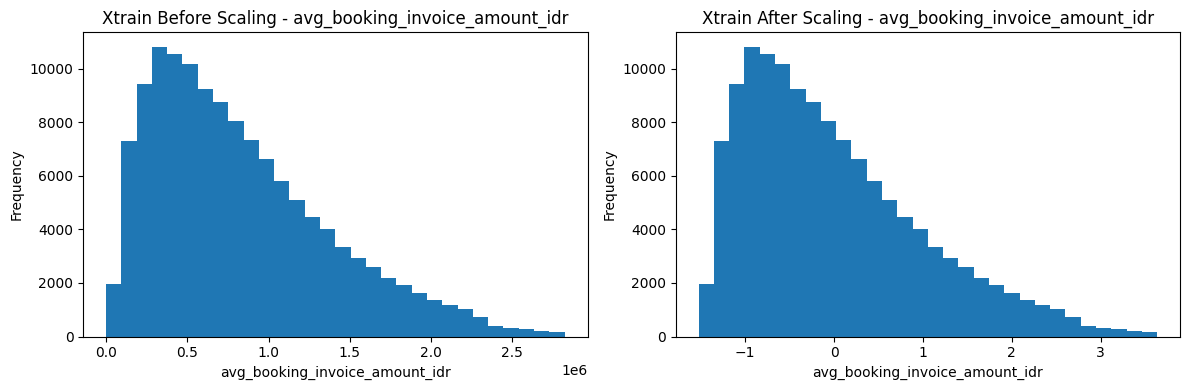

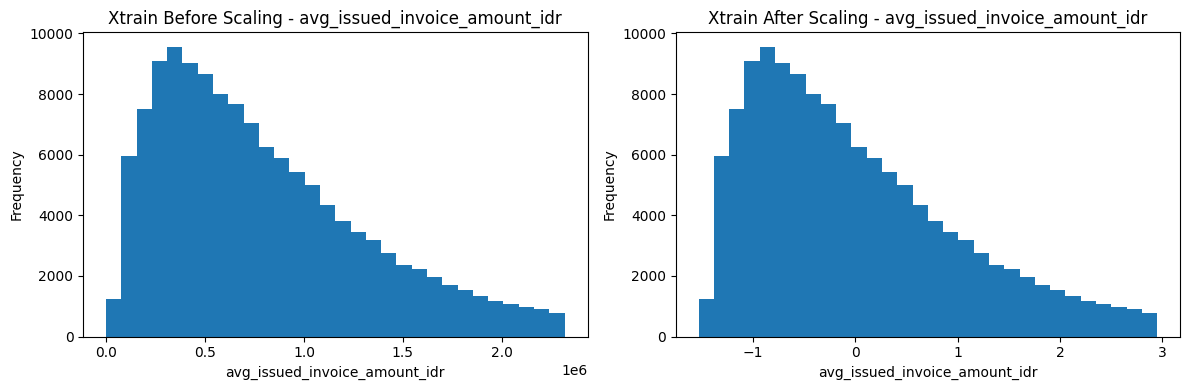

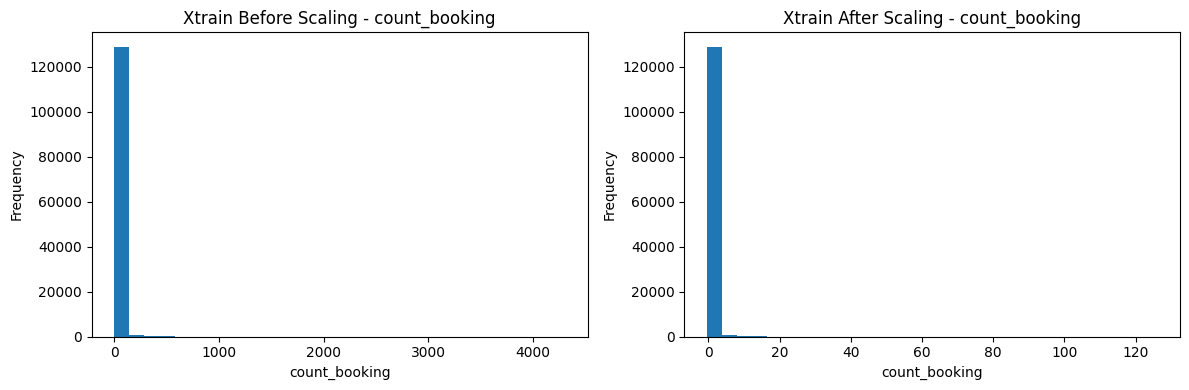

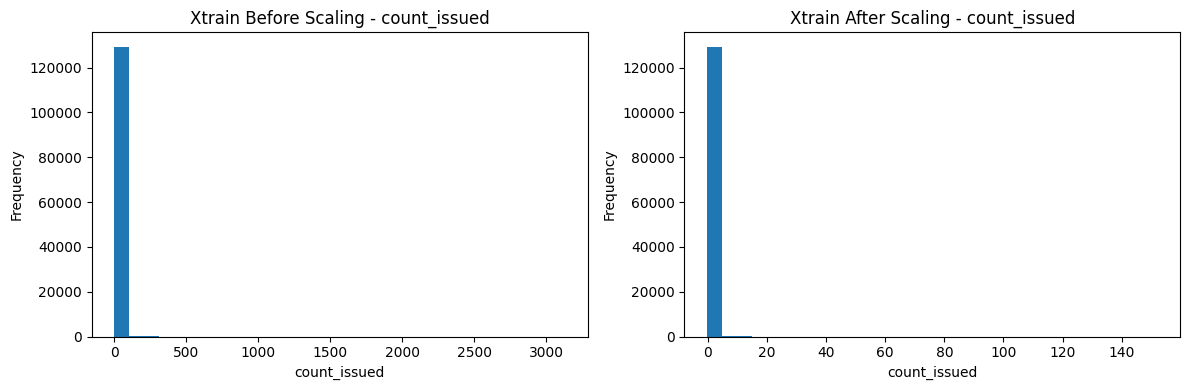

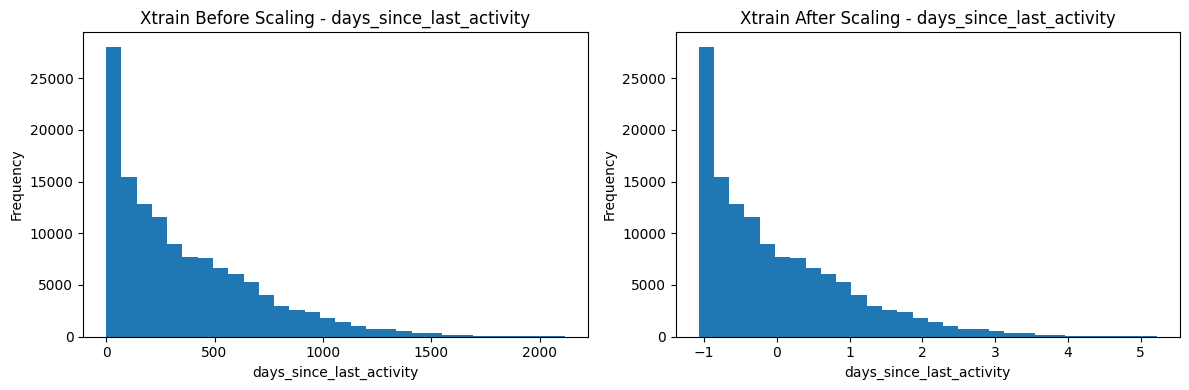

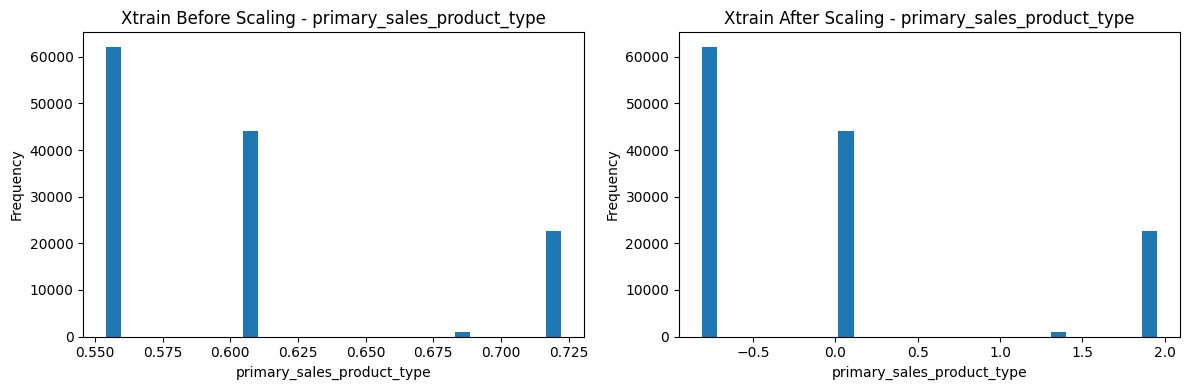

In [108]:
import matplotlib.pyplot as plt

# Plotting before and after scaling for each column
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Before scaling
    Xtrain[col].plot(kind='hist', ax=ax[0], bins=30, title=f'Xtrain Before Scaling - {col}')
    ax[0].set_xlabel(col)

    # After scaling
    Xtrain_scaled[col].plot(kind='hist', ax=ax[1], bins=30, title=f'Xtrain After Scaling - {col}')
    ax[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

In [109]:
Xtrain_scaled

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,days_since_last_activity,primary_sales_product_type
126344,-0.853496,-0.819516,-0.359261,-0.299925,0.082153,0.103577
199477,-0.324129,0.020647,-0.241737,-0.251256,-0.409751,-0.809955
351,-1.331526,-1.353532,1.080404,0.722128,-1.026867,1.954103
265951,-0.507534,-0.588039,-0.065452,0.138098,-0.770481,1.954103
5333,0.979698,1.506852,1.609260,1.452166,0.738025,-0.809955
...,...,...,...,...,...,...
256834,0.964640,1.057398,0.316500,0.040760,-1.074567,-0.809955
206912,0.139681,-0.588625,-0.124213,-0.202586,0.117928,-0.809955
267256,0.867807,0.776400,0.375262,0.186767,0.904974,-0.809955
204324,1.426151,1.588608,-0.329880,-0.202586,-0.302427,-0.809955


In [110]:
ytrain_series = pd.Series(ytrain)
print(ytrain_series.value_counts())

1    78342
0    51495
dtype: int64


In [111]:
78511/(78511+51560)

0.6036011101629111

In [112]:
ytest_series = pd.Series(ytest)
print(ytest_series.value_counts())

1    108410
0     86994
dtype: int64


In [113]:
108410/(108410+86994)

0.5547992876297312

## D. Baseline Modelling
1. In this section, we can use evaluation matrix, such as: Precision, Recall (Sensitivity), and F1-Score or ROC and AUC. This is because the ratio data in target column we have is not churned : 58933, churned : 89678, around 40% dan 60%.

#### Using Classification for modelling
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Naive Bayes
4. Support Vector Machine (SVM)

1. TP : Prediksi Positif dan data ytest nya true
2. TN : Prediksi Negatif dan data ytest (actual) nya true
3. FP : Prediksi Positif tapi data ytest false (negatif)
4. FN : Prediksi Negatif tapi data ytest false (positif)
5. ytest, yprediction

#### 1. Logistic Regression

In [114]:
# Initiate classifier
logistic_regression = LogisticRegression()

# Fit model to training data
logistic_regression.fit(Xtrain_scaled, ytrain_series)

LogisticRegression()

##### Predict the test set results and calculate the accuracy.

In [115]:
y_train_logreg_pred = logistic_regression.predict_proba(Xtrain_scaled)[:, 1]
y_test_logreg_pred = logistic_regression.predict_proba(Xtest_scaled)[:, 1]

roc_auc_train_logreg = roc_auc_score(ytrain_series, y_train_logreg_pred)
roc_auc_test_logreg = roc_auc_score(ytest_series, y_test_logreg_pred)

print("Logistic Regression ROC AUC on training set:", roc_auc_train_logreg)
print("Logistic Regression ROC AUC on testing set:", roc_auc_test_logreg)


Logistic Regression ROC AUC on training set: 0.9999999890933102
Logistic Regression ROC AUC on testing set: 0.9999996264454776


#### 2. K-Nearest Neighbours (KNN)
In this section, the grid search algorithm was used to find the best parameters for the k values in order to have the best accuracy.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

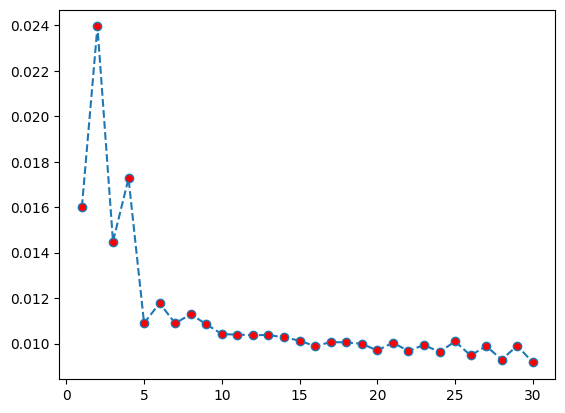

In [116]:
# finding the K value
error = []

for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain_scaled,ytrain_series)
    preds = knn.predict(Xtest_scaled.values)
    error.append(np.mean(preds!=ytest_series))

plt.plot(range(1,31,1), error, linestyle = 'dashed', marker ='o', mfc= 'red')
plt.show()

In [117]:
#Fit the training sets to the model.
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(Xtrain_scaled, ytrain_series)

KNeighborsClassifier(n_neighbors=6)

##### Predict the test set results and calculate the accuracy.

In [118]:
y_train_knn_pred = knn.predict_proba(Xtrain_scaled)[:, 1]
y_test_knn_pred = knn.predict_proba(Xtest_scaled)[:, 1]

roc_auc_train_knn = roc_auc_score(ytrain_series, y_train_knn_pred)
roc_auc_test_knn = roc_auc_score(ytest_series, y_test_knn_pred)

print("K-Nearest Neighbours (KNN) ROC AUC on training set:", roc_auc_train_knn)
print("K-Nearest Neighbours (KNN) ROC AUC on testing set:", roc_auc_test_knn)

K-Nearest Neighbours (KNN) ROC AUC on training set: 0.9999009860958817
K-Nearest Neighbours (KNN) ROC AUC on testing set: 0.9994180192314606


#### 3. Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [120]:
naive_bayes.fit(Xtrain_scaled, ytrain_series)

GaussianNB()

##### Predict the test set results and calculate the accuracy.

In [121]:
y_train_naive_bayes_pred = naive_bayes.predict_proba(Xtrain_scaled)[:, 1]
y_test_naive_bayes_pred = naive_bayes.predict_proba(Xtest_scaled)[:, 1]

roc_auc_train_naive_bayes = roc_auc_score(ytrain_series, y_train_naive_bayes_pred)
roc_auc_test_naive_bayes = roc_auc_score(ytest_series, y_test_naive_bayes_pred)

print("Naive_bayes ROC AUC on training set:", roc_auc_train_naive_bayes)
print("Naive_bayes ROC AUC on testing set:", roc_auc_test_naive_bayes)

Naive_bayes ROC AUC on training set: 0.986341951261677
Naive_bayes ROC AUC on testing set: 0.9799343822587393


#### 4. Support Vector Machine (SVM)

A linear SVM was chosen by using the SVC classifier to make prediction on Xtest dataset by fitting the Xtrain and ytrain datasets into the SVM model.

In [122]:
# Create the SVM model with linear kernel and probability estimates enabled
svm_linear = SVC(kernel='linear', probability=True, random_state=42)

In [123]:
# Fit the model on the scaled training data
svm_linear.fit(Xtrain_scaled, ytrain_series)

SVC(kernel='linear', probability=True, random_state=42)

##### Predict the test set results and calculate the accuracy.

In [124]:
y_train_svm_linear_pred = svm_linear.predict_proba(Xtrain_scaled)[:, 1]
y_test_svm_linear_pred = svm_linear.predict_proba(Xtest_scaled)[:, 1]

roc_auc_train_svm_linear = roc_auc_score(ytrain_series, y_train_svm_linear_pred)
roc_auc_test_nsvm_linear = roc_auc_score(ytest_series, y_test_svm_linear_pred)

print("Support Vector Machine (SVM) ROC AUC on training set:", roc_auc_train_svm_linear)
print("Support Vector Machine (SVM) ROC AUC on testing set:", roc_auc_test_nsvm_linear)

Support Vector Machine (SVM) ROC AUC on training set: 0.9999997880631877
Support Vector Machine (SVM) ROC AUC on testing set: 0.9999938643431121


## E. Evaluation
The evaluation method used involving confusion metrix, precision-recall curve and also learning curve.
1. Learning Curve
2. Model Evaluation
3. Precision Recall Curve

In [125]:
# Merge Xtrain dan Xtest beforehand
X = pd.concat([Xtrain_scaled, Xtest_scaled], axis=0)

# Gabungkan data ytrain dan ytest sebelum melakukan learning curve
y = pd.concat([ytrain_series, ytest_series], axis=0)

In [126]:
X

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,days_since_last_activity,primary_sales_product_type
126344,-0.853496,-0.819516,-0.359261,-0.299925,0.082153,0.103577
199477,-0.324129,0.020647,-0.241737,-0.251256,-0.409751,-0.809955
351,-1.331526,-1.353532,1.080404,0.722128,-1.026867,1.954103
265951,-0.507534,-0.588039,-0.065452,0.138098,-0.770481,1.954103
5333,0.979698,1.506852,1.609260,1.452166,0.738025,-0.809955
...,...,...,...,...,...,...
256834,0.964640,1.057398,0.316500,0.040760,-1.074567,-0.809955
206912,0.139681,-0.588625,-0.124213,-0.202586,0.117928,-0.809955
267256,0.867807,0.776400,0.375262,0.186767,0.904974,-0.809955
204324,1.426151,1.588608,-0.329880,-0.202586,-0.302427,-0.809955


In [127]:
y

0         0
1         1
2         1
3         1
4         0
         ..
195399    1
195400    0
195401    0
195402    1
195403    1
Length: 325241, dtype: int64

### 1. Learning Curve

#### Function Learning Curve

In [128]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

#### Learning Curves : Logistic Regression

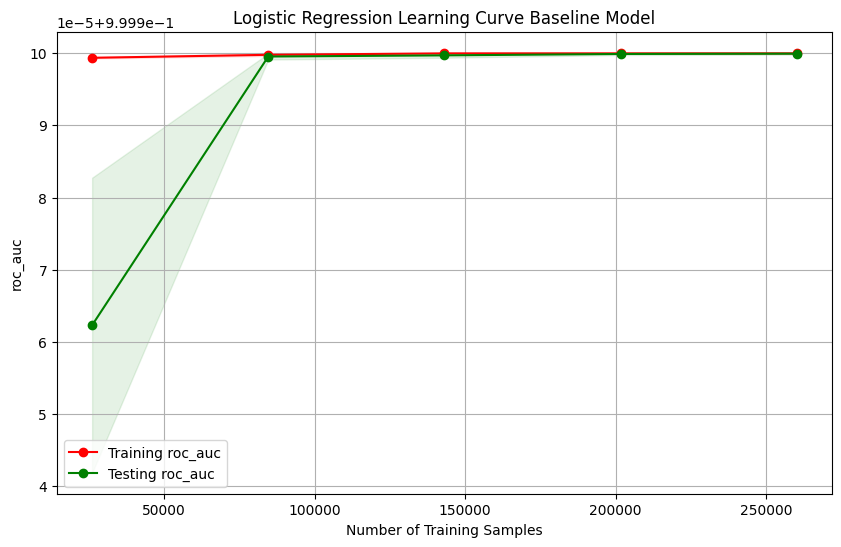

In [129]:
plot_learning_curve_classification(logistic_regression, X, y, cv=5, scoring='roc_auc', title="Logistic Regression Learning Curve Baseline Model")

Best Model in this case is Logistic Regression

#### Learning Curves : KNN

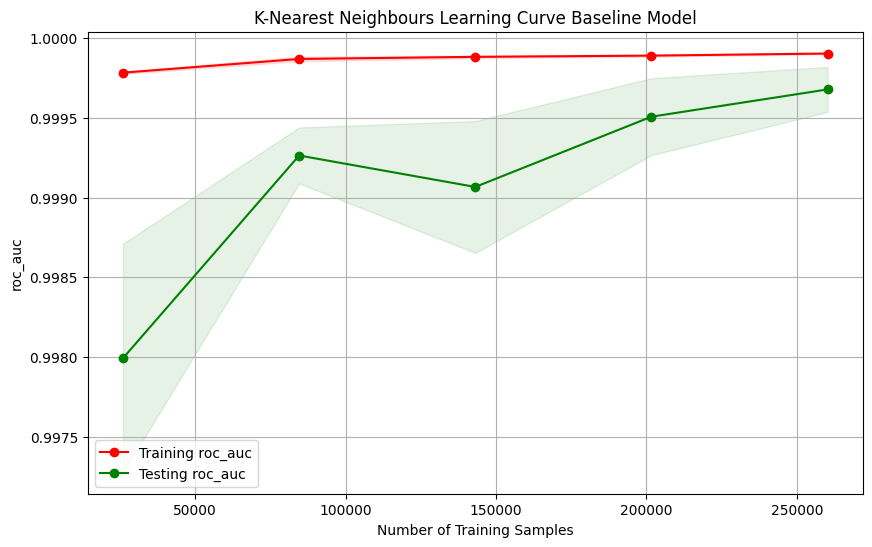

In [130]:
plot_learning_curve_classification(knn, X.values, y.values, cv=5, scoring='roc_auc', title="K-Nearest Neighbours Learning Curve Baseline Model")

#### Learning Curves : Naive Bayes

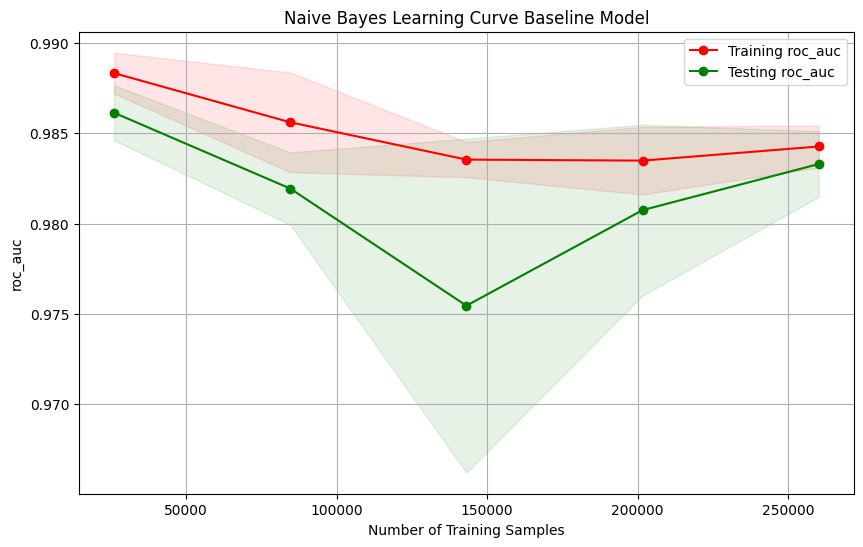

In [131]:
plot_learning_curve_classification(naive_bayes, X, y, cv=5, scoring='roc_auc', title="Naive Bayes Learning Curve Baseline Model")

#### Learning Curves : SVM

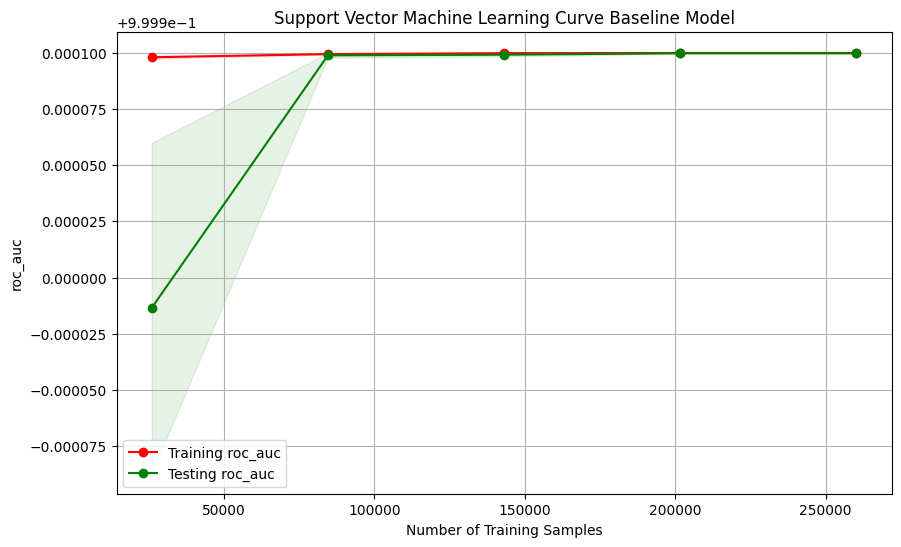

In [132]:
plot_learning_curve_classification(svm_linear, X, y, cv=5, scoring='roc_auc', title="Support Vector Machine Learning Curve Baseline Model")

### 2. Model Evaluation

Model Evaluation Function

In [133]:
def model_evaluation(model,name):

    confusion_matrix = pd.crosstab(ytest_series, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NOT CHURNED', 'CHURN'],va='center')
    plt.xticks([0.5,1.5], [ 'NOT CHURNED', 'CHURN'],va='center')
    plt.show()

    target_names = ['NOT CHURNED' , 'NOT CHURNED']
    print ('Accuracy:', accuracy_score(ytest_series, model))
    print ('Precision:', precision_score(ytest_series, model,pos_label=1))
    print ('F1 score:', f1_score(ytest_series, model,pos_label=1))
    print ('Recall:', recall_score(ytest_series, model,pos_label=1))
    print ('\n clasification report:\n', classification_report(ytest_series,model,target_names=target_names))

In [142]:
def evaluate(model, x_test = Xtest_scaled, y_test = ytest_series, x_train=Xtrain_scaled, y_train=ytrain_series):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

#### Logistic Regression

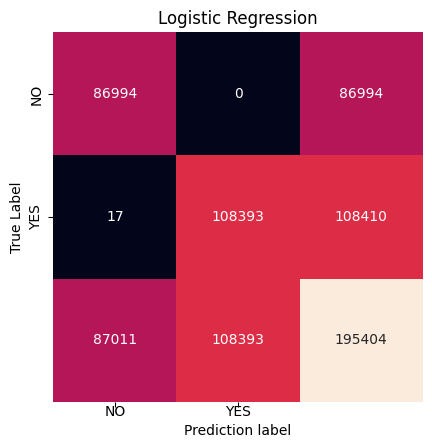

Accuracy: 0.9999130007574052
Precision: 1.0
F1 score: 0.9999215878009068
Recall: 0.9998431878977954

 clasification report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00     86994
         Yes       1.00      1.00      1.00    108410

    accuracy                           1.00    195404
   macro avg       1.00      1.00      1.00    195404
weighted avg       1.00      1.00      1.00    195404



In [138]:
lr_y_pred = logistic_regression.predict(Xtest_scaled)
model_evaluation(lr_y_pred,"Logistic Regression")

In [143]:
evaluate(logistic_regression, x_test = Xtest_scaled, y_test = ytest_series, x_train=Xtrain_scaled, y_train=ytrain_series)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51495
           1       1.00      1.00      1.00     78342

    accuracy                           1.00    129837
   macro avg       1.00      1.00      1.00    129837
weighted avg       1.00      1.00      1.00    129837

------
Assuming 1 as positive, we get for Data Train:

True Positive: 78341
True Negative: 51495
False Positive: 0
False Negative: 1

Accuracy Data Train: 0.9999922980352288
Precision Data Train: 1.0
Recall Data Train: 0.9999872354548007
F1-Score Data Train: 0.9999936176866667
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86994
           1       1.00      1.00      1.00    108410

    accuracy                           1.00    195404
   macro avg       1.00      1.00      1.00    195404
weighte

#### KNN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


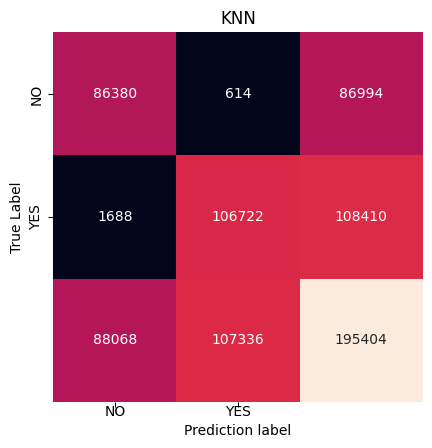

Accuracy: 0.988219279032159
Precision: 0.9942796452262056
F1 score: 0.989330045516487
Recall: 0.9844294806752145

 clasification report:
               precision    recall  f1-score   support

          No       0.98      0.99      0.99     86994
         Yes       0.99      0.98      0.99    108410

    accuracy                           0.99    195404
   macro avg       0.99      0.99      0.99    195404
weighted avg       0.99      0.99      0.99    195404



In [144]:
knn_y_pred = knn.predict(Xtest_scaled.values)
model_evaluation(knn_y_pred,"KNN")

In [145]:
evaluate(knn, x_test = Xtest_scaled.values, y_test = ytest_series.values, x_train=Xtrain_scaled.values, y_train=ytrain_series.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     51495
           1       1.00      0.99      1.00     78342

    accuracy                           0.99    129837
   macro avg       0.99      0.99      0.99    129837
weighted avg       0.99      0.99      0.99    129837

------
Assuming 1 as positive, we get for Data Train:

True Positive: 77902
True Negative: 51264
False Positive: 231
False Negative: 440

Accuracy Data Train: 0.9948319816385159
Precision Data Train: 0.9970435027453188
Recall Data Train: 0.994383600112328
F1-Score Data Train: 0.9957117750439367


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     86994
           1       0.99      0.98      0.99    108410

    accuracy                           0.99    195404
   macro avg       0.99      0.99      0.99    195404
weighted avg       0.99      0.99      0.99    195404

------
Assuming 1 as positive, we get:

True Positive: 106722
True Negative: 86380
False Positive: 614
False Negative: 1688

Accuracy Data Test: 0.988219279032159
Precision Data Test: 0.9942796452262056
Recall Data Test: 0.9844294806752145
F1-Score Data Test: 0.989330045516487


#### Naive Bayes

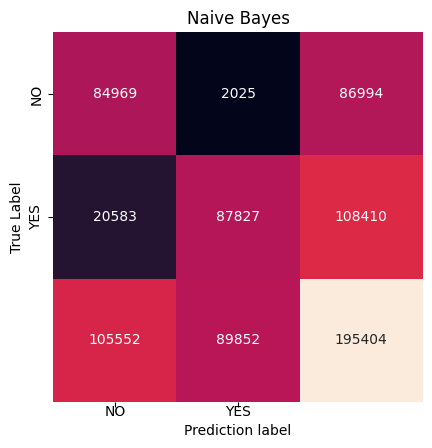

Accuracy: 0.8843012425538883
Precision: 0.9774629390553354
F1 score: 0.8859690712289798
Recall: 0.8101374411954617

 clasification report:
               precision    recall  f1-score   support

          No       0.80      0.98      0.88     86994
         Yes       0.98      0.81      0.89    108410

    accuracy                           0.88    195404
   macro avg       0.89      0.89      0.88    195404
weighted avg       0.90      0.88      0.88    195404



In [146]:
nb_y_pred = naive_bayes.predict(Xtest_scaled)
model_evaluation(nb_y_pred,"Naive Bayes")

In [148]:
evaluate(naive_bayes, x_test = Xtest_scaled, y_test = ytest_series, x_train=Xtrain_scaled, y_train=ytrain_series)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.78      0.98      0.87     51495
           1       0.99      0.82      0.89     78342

    accuracy                           0.88    129837
   macro avg       0.88      0.90      0.88    129837
weighted avg       0.91      0.88      0.88    129837

------
Assuming 1 as positive, we get for Data Train:

True Positive: 64024
True Negative: 50694
False Positive: 801
False Negative: 14318

Accuracy Data Train: 0.8835539946240286
Precision Data Train: 0.9876436559969147
Recall Data Train: 0.8172372418370734
F1-Score Data Train: 0.8943960549567987
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     86994
           1       0.98      0.81      0.89    108410

    accuracy                           0.88    195404
   macro avg       0.89      0.89      0

#### SVM

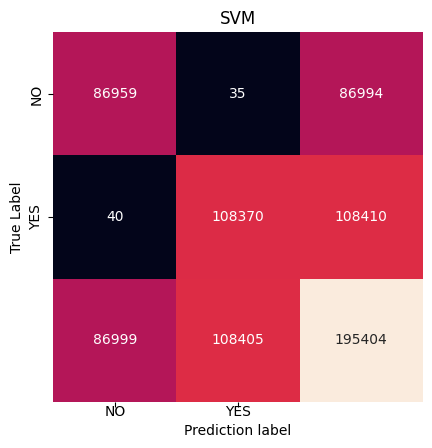

Accuracy: 0.9996161798120816
Precision: 0.999677136663438
F1 score: 0.999654082973964
Recall: 0.9996310303477539

 clasification report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00     86994
         Yes       1.00      1.00      1.00    108410

    accuracy                           1.00    195404
   macro avg       1.00      1.00      1.00    195404
weighted avg       1.00      1.00      1.00    195404



In [147]:
svm_y_pred = svm_linear.predict(Xtest_scaled)
model_evaluation(svm_y_pred,"SVM")

In [149]:
evaluate(svm_linear, x_test = Xtest_scaled, y_test = ytest_series, x_train=Xtrain_scaled, y_train=ytrain_series)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51495
           1       1.00      1.00      1.00     78342

    accuracy                           1.00    129837
   macro avg       1.00      1.00      1.00    129837
weighted avg       1.00      1.00      1.00    129837

------
Assuming 1 as positive, we get for Data Train:

True Positive: 78330
True Negative: 51471
False Positive: 24
False Negative: 12

Accuracy Data Train: 0.9997227292682364
Precision Data Train: 0.9996936978329122
Recall Data Train: 0.999846825457609
F1-Score Data Train: 0.9997702557818962
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86994
           1       1.00      1.00      1.00    108410

    accuracy                           1.00    195404
   macro avg       1.00      1.00      1.00  

## Conclusion

The 3 best baseline models are: Logistic Regression, SVM, Naive Bayes.
You can improve with another technique in feature engineering such as encoding using mean encoding or another technique. You can apply hyperparameter technique to increase Machine Learning Performance.